# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.Simulator(results, waves =  1, bundles =  5000000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/OPTICS/SIM/optic-sim/simulation.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/1 [00:00<?, ?it/s]


  _     ._   __/__   _ _  _  _ _/_   Recorded: 08:52:33  Samples:  325
 /_//_/// /_\ / //_// / //_'/ //     Duration: 1.613     CPU time: 1.616
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-5f9ff51e-a16f-419e-81b6-35c7d8863f70.json

1.612 run_code  IPython/core/interactiveshell.py:3400
└─ 1.612 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 1.612 run_all_waves  simulation.py:27
      ├─ 1.588 run  simulation.py:32
      │  ├─ 1.139 record_results  simulation.py:129
      │  │  ├─ 0.813 histogram  stats_cuda.py:43
      │  │  │  ├─ 0.352 histogram_4d  stats_cuda.py:298
      │  │  │  │  └─ 0.332 histogramdd  cupy/_statistics/histogram.py:285
      │  │  │  │     ├─ 0.203 [self]  
      │  │  │  │     ├─ 0.082 bincount  cupy/_statistics/histogram.py:513
      │  │  │  │     │  └─ 0.070 [self]  
      │  │  │  │     └─ 0.033 _compile_module_with_cache  cupy/cuda/compiler

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))
print(cp.sum(results._box_stage._histogram_4d_count._hist))
print(cp.sum(results._diffuser_stage._histogram_4d_count._hist))


4999997.0
4225732.0
2631253.0


# <center> Source

photon bundle count: 5000000
photon total energy (J): 8.947954311482777e-05


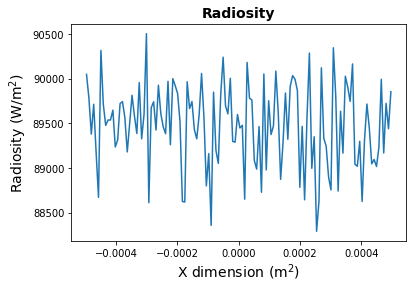

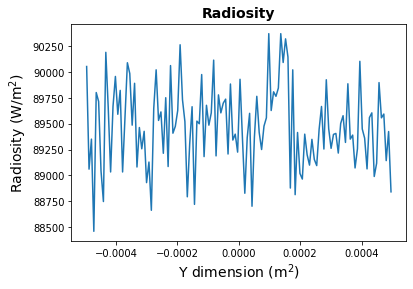

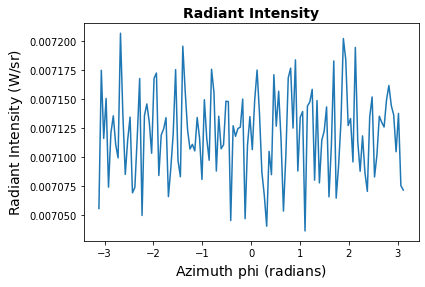

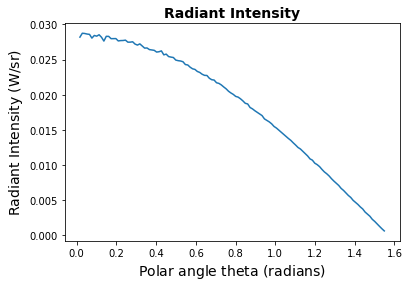

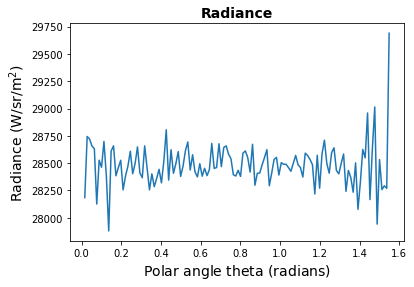

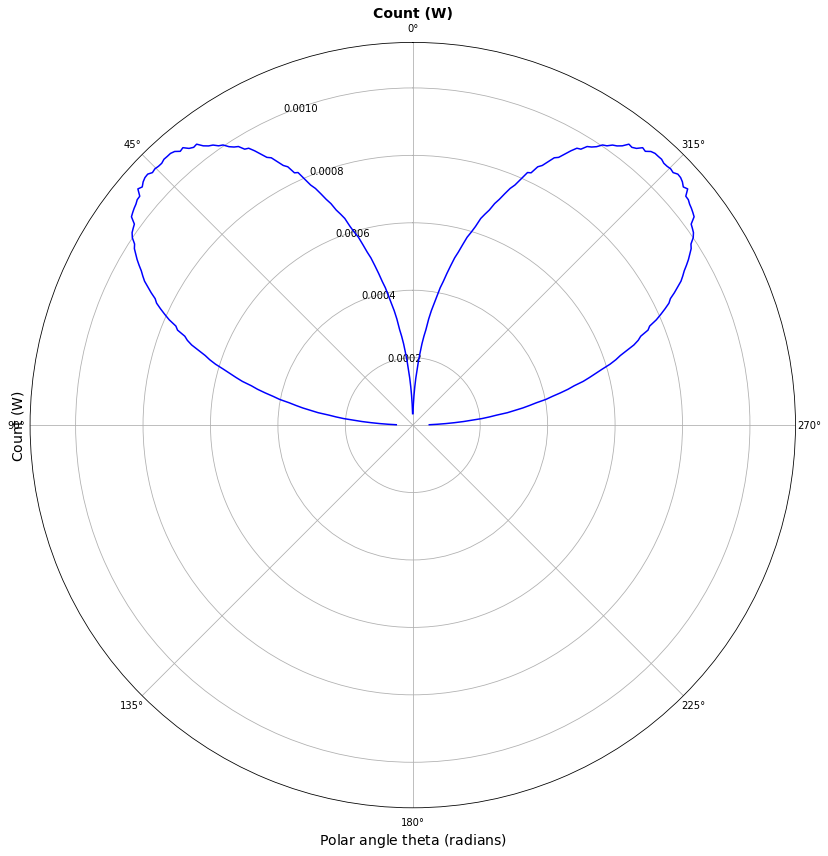

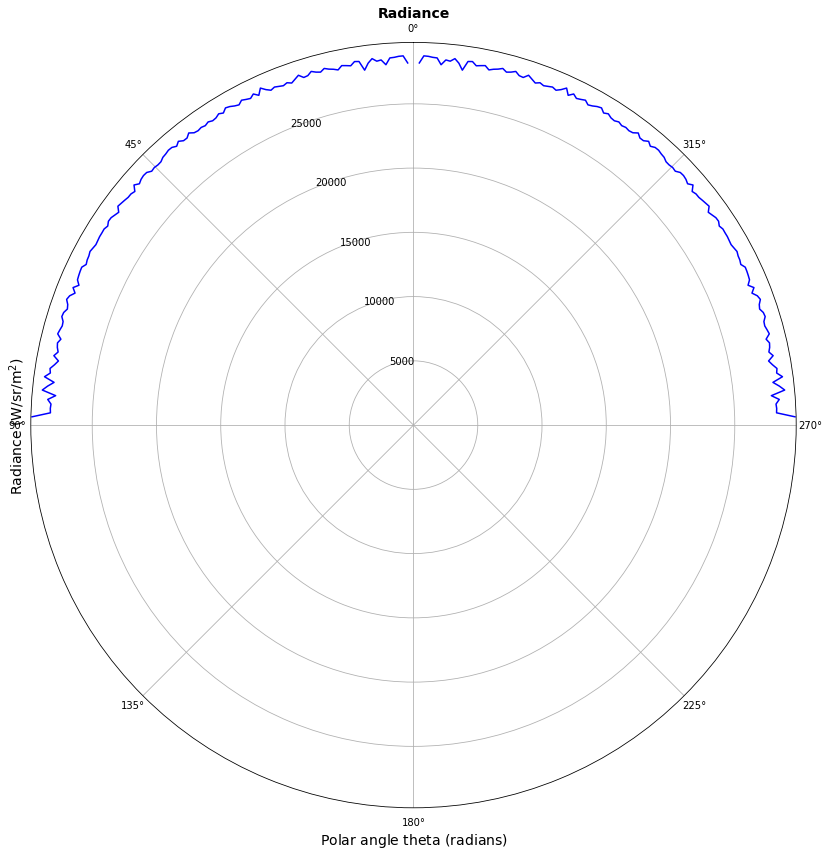

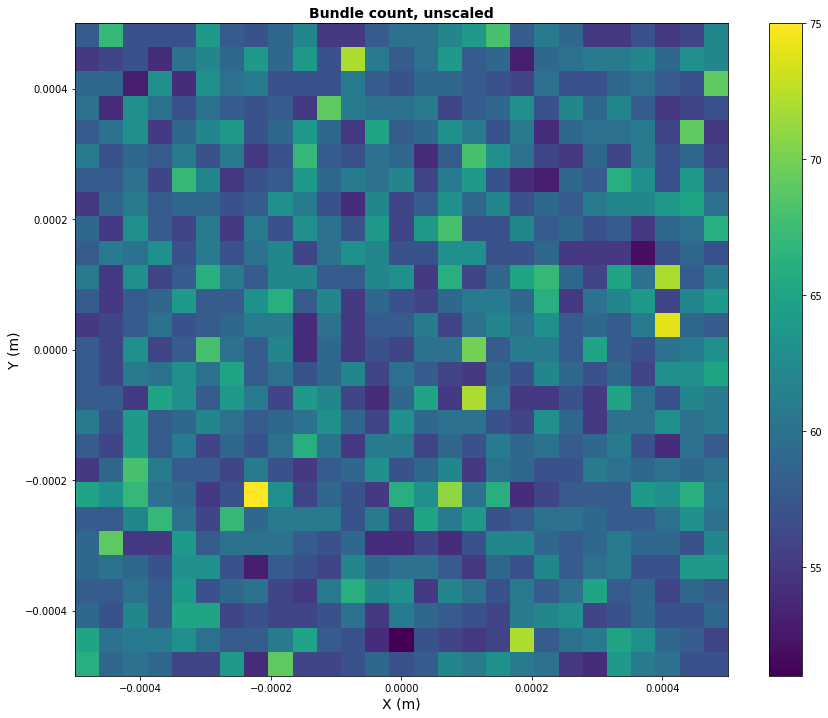

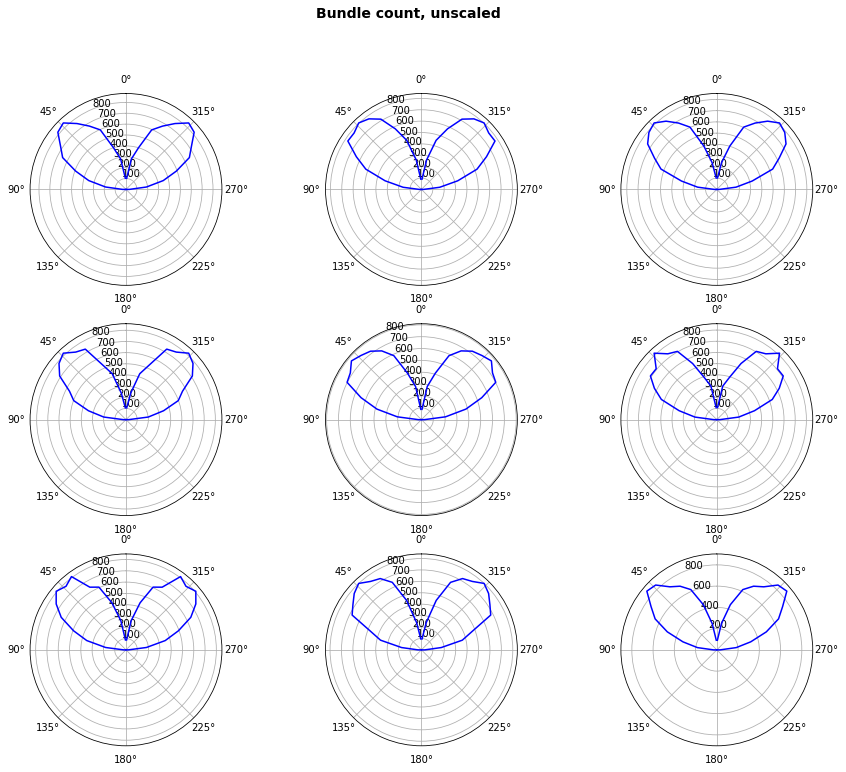

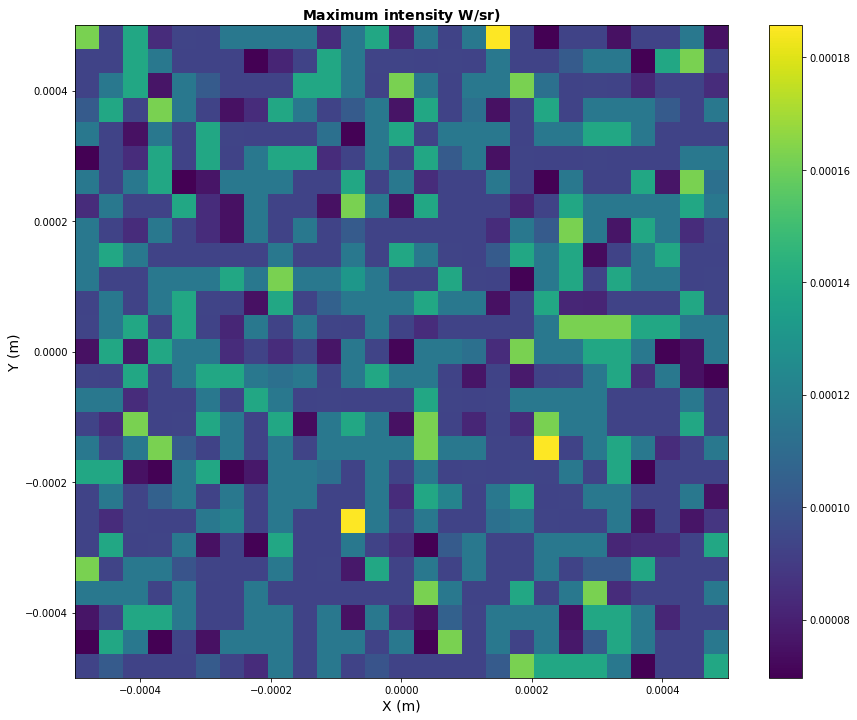

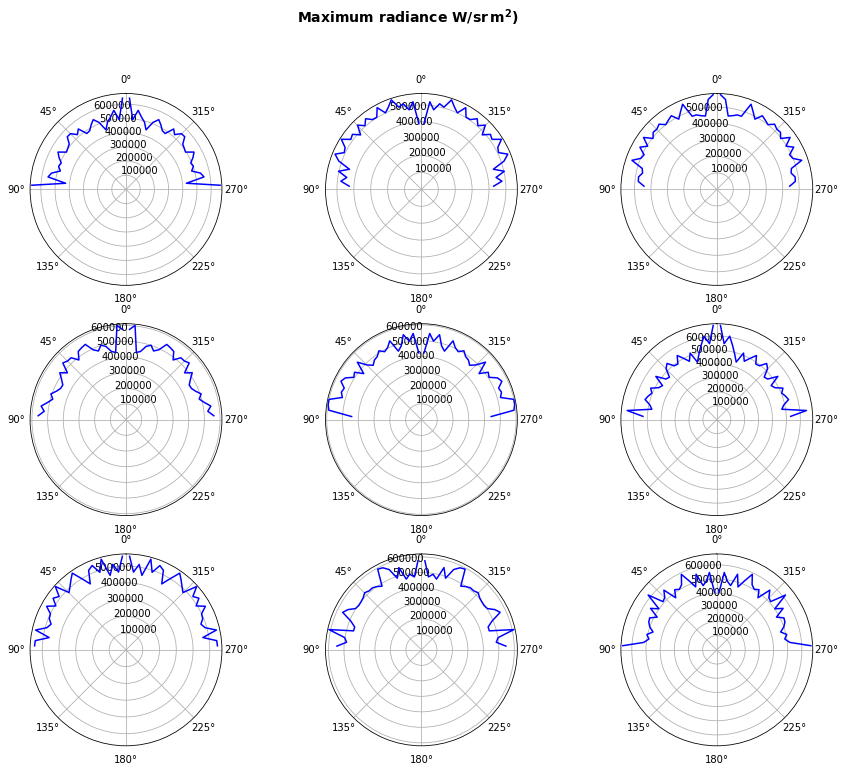

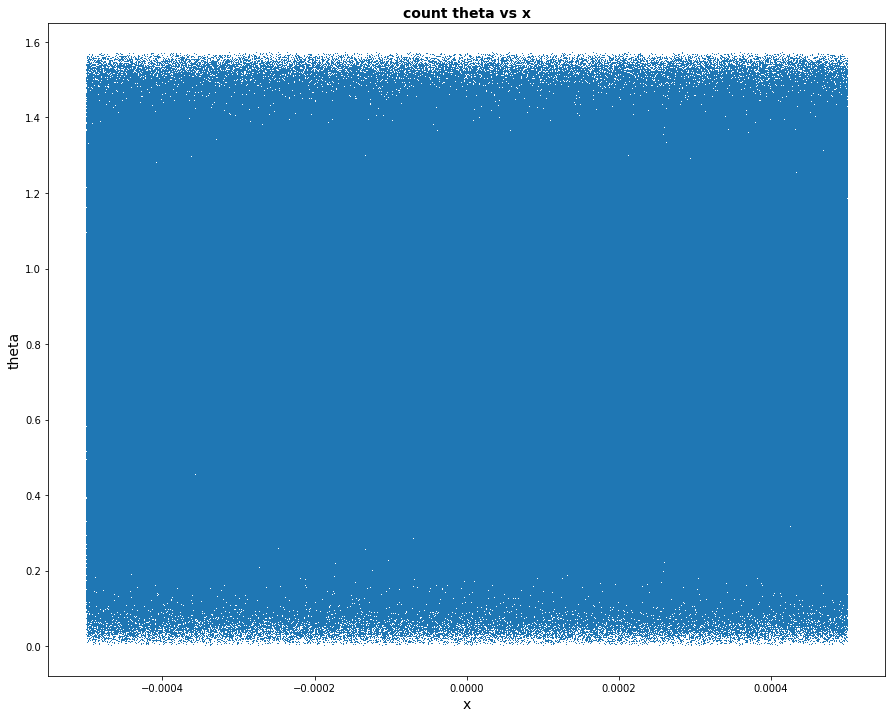

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Lightbox

photon bundle count: 4225734
photon total energy (J): 7.562334952895304e-05


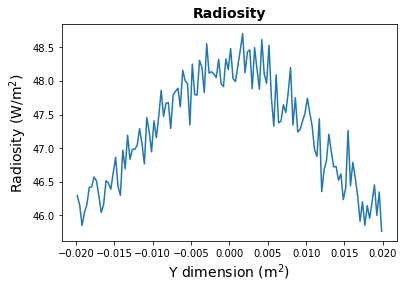

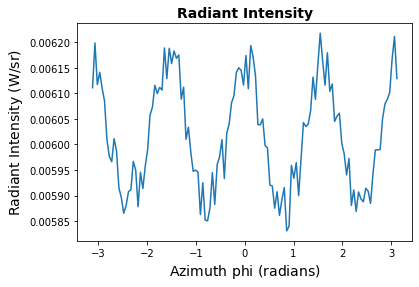

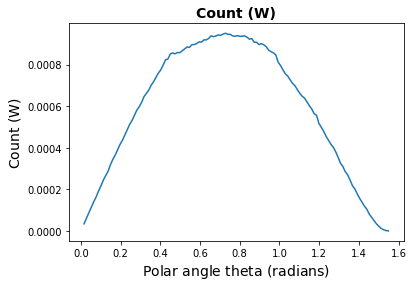

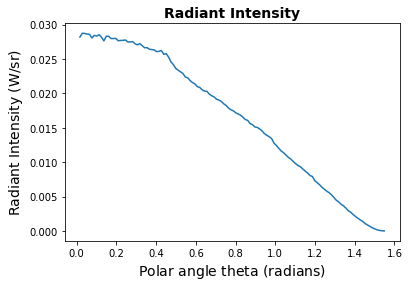

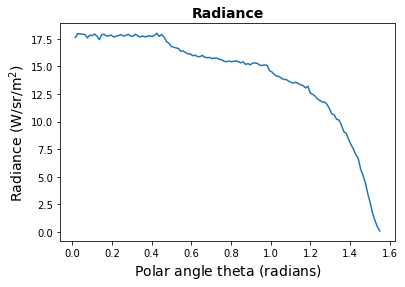

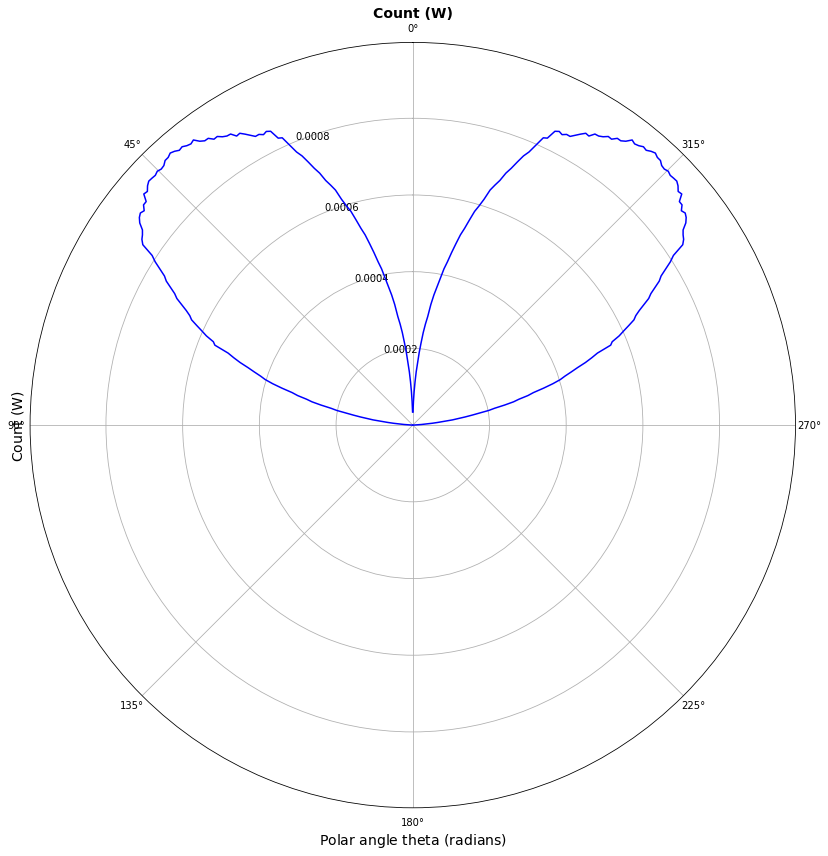

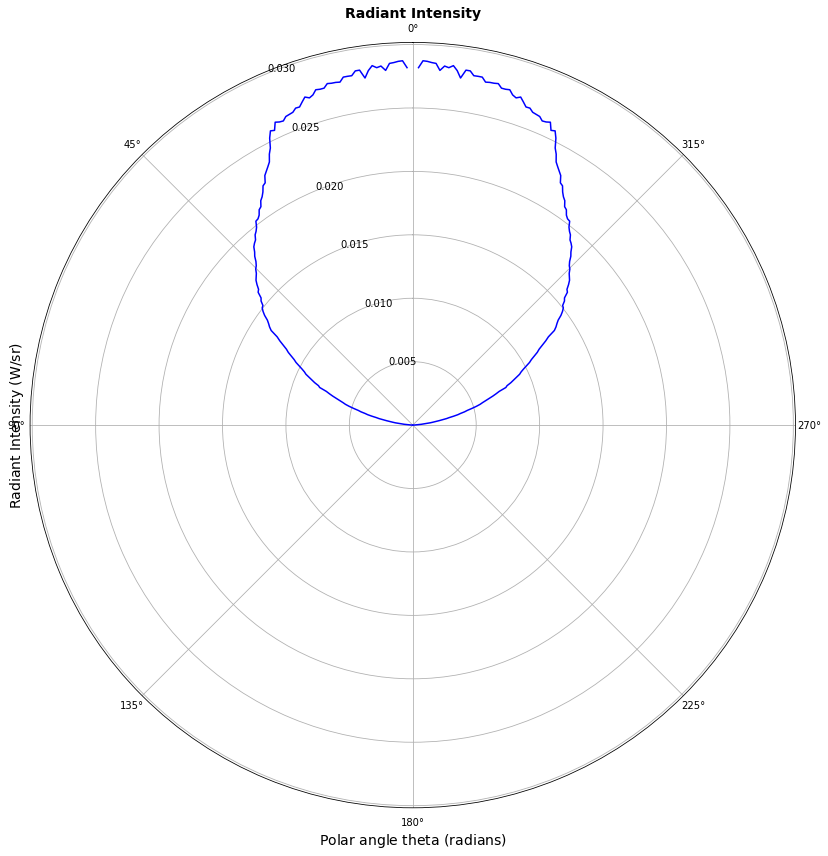

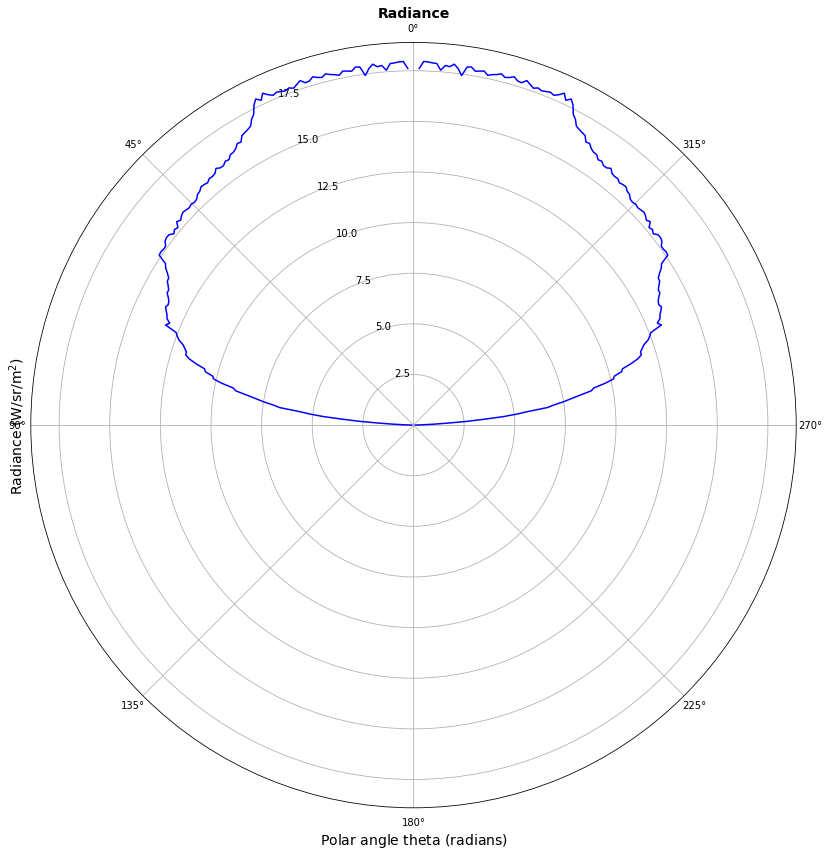

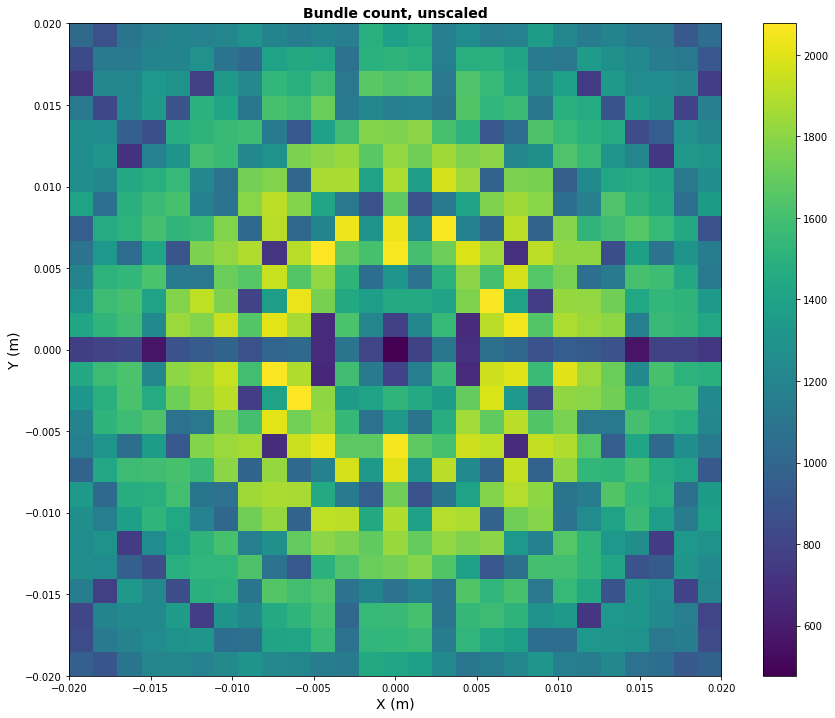

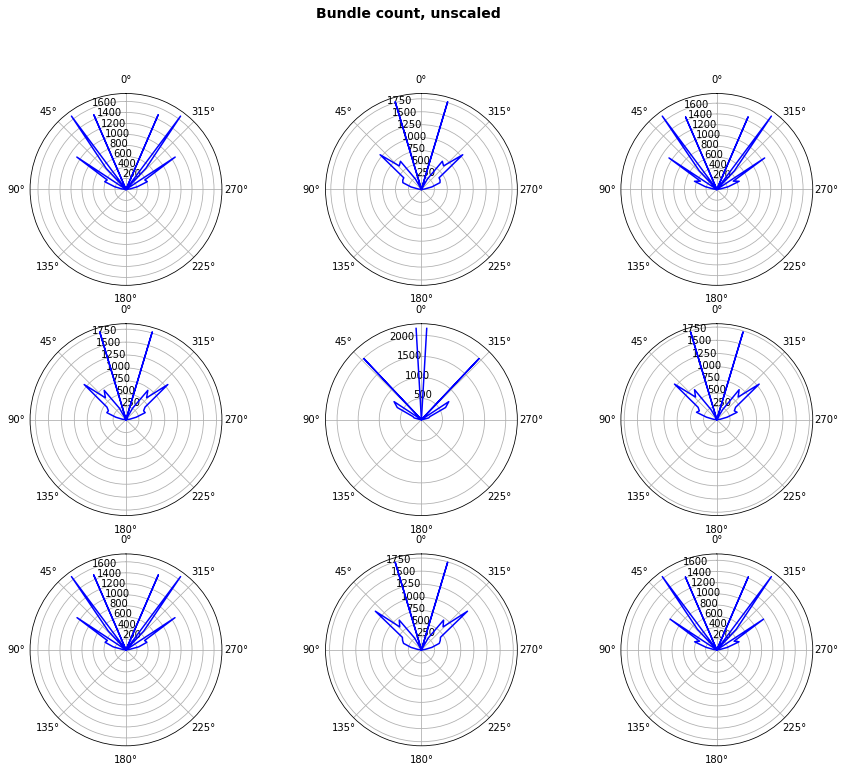

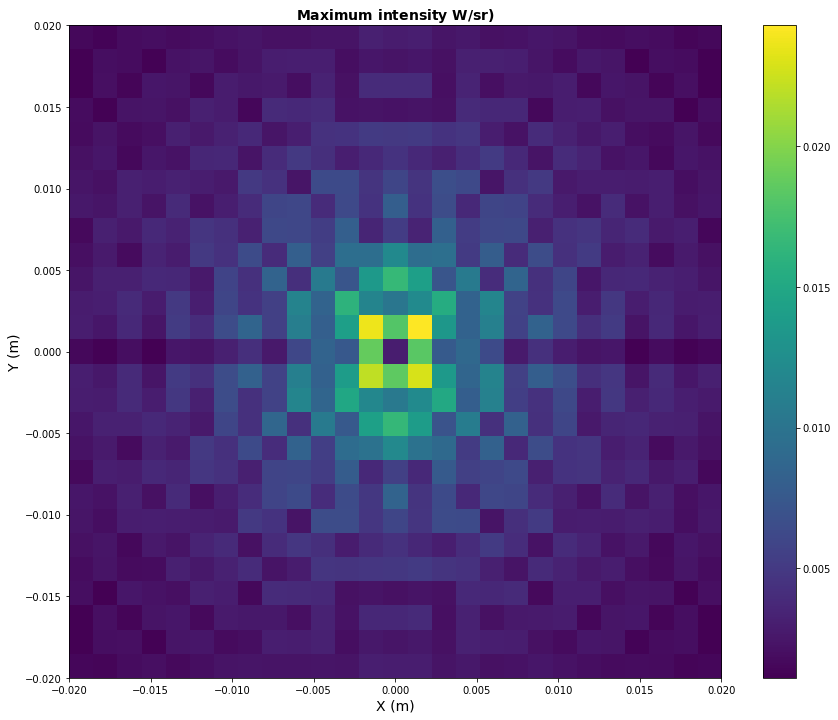

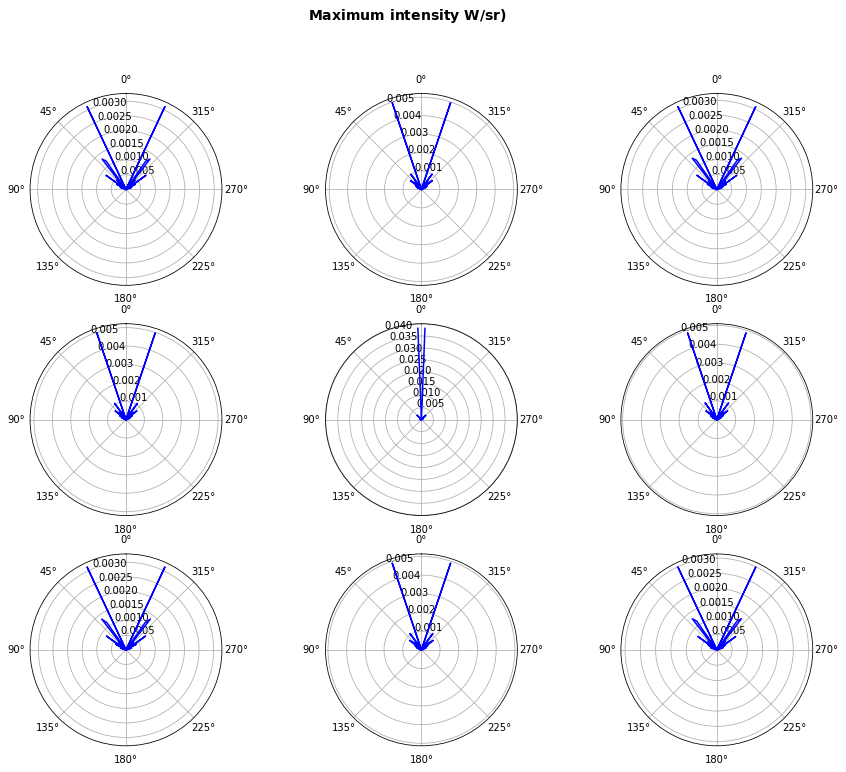

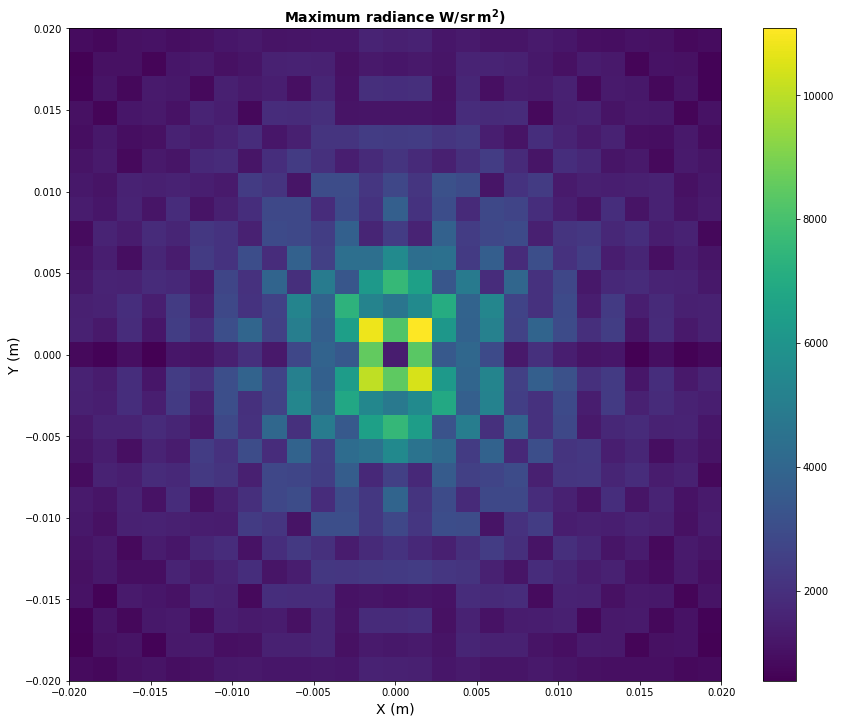

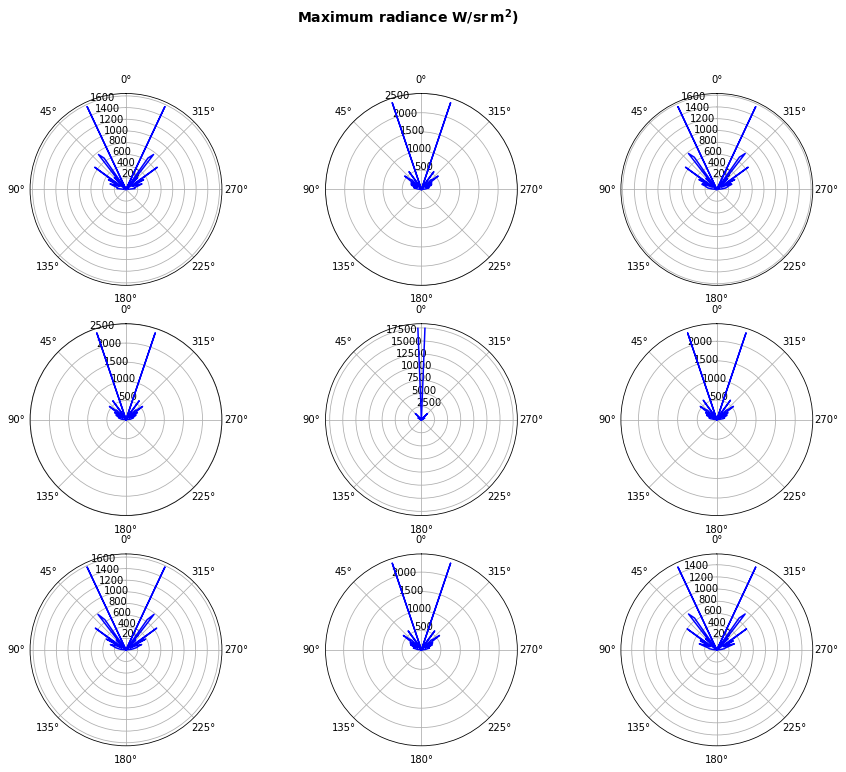

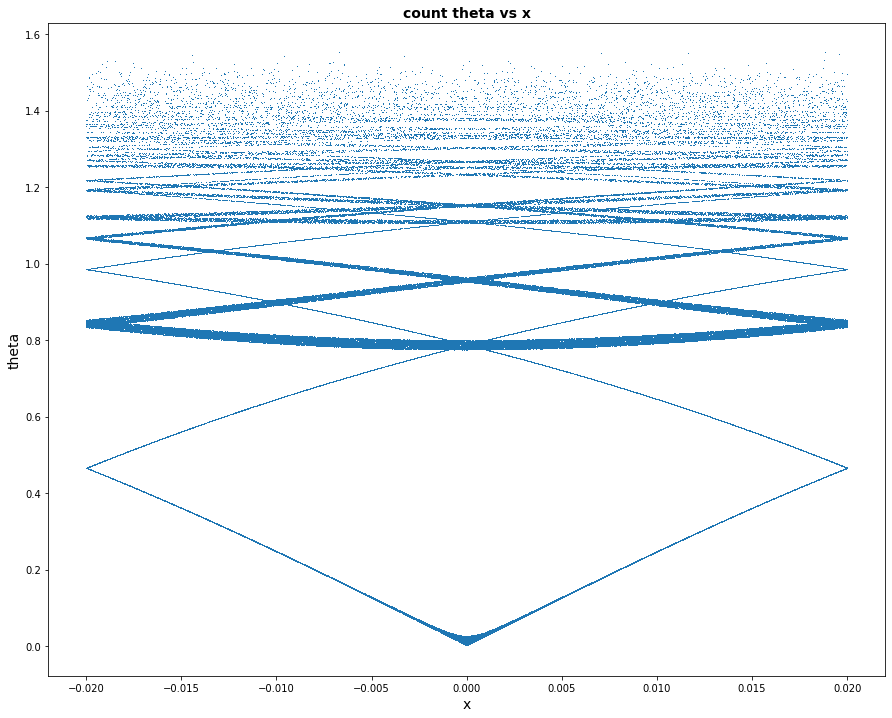

Output()

In [5]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

# <center> Diffuser

photon bundle count: 2631253
photon total energy (J): 4.708866325189695e-05


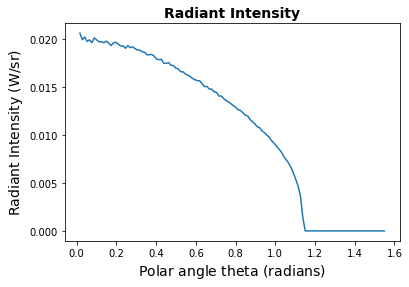

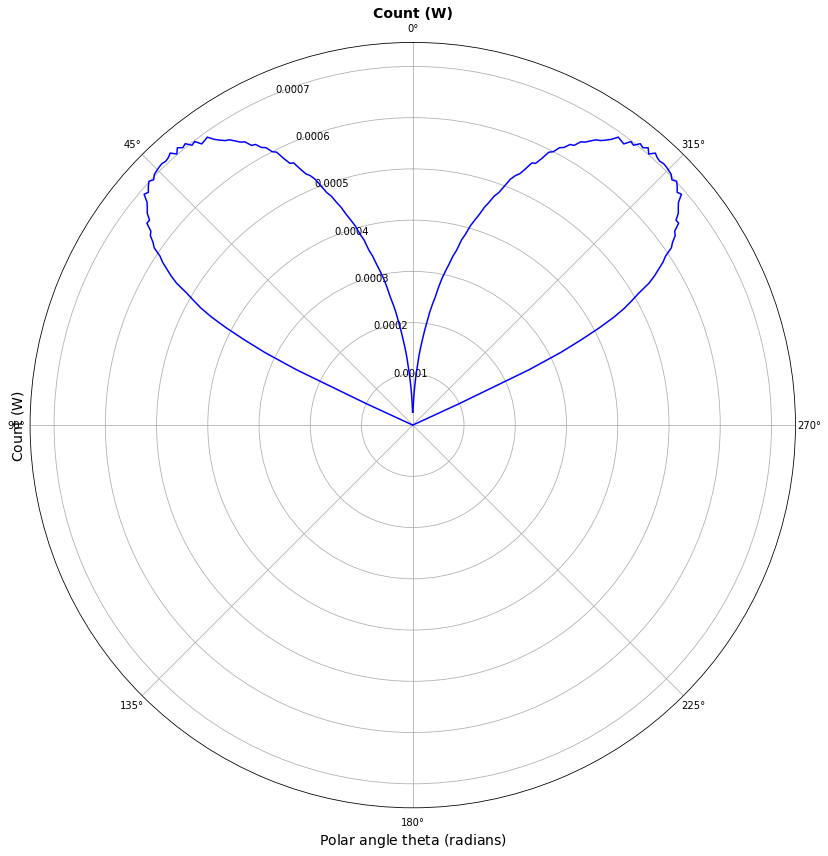

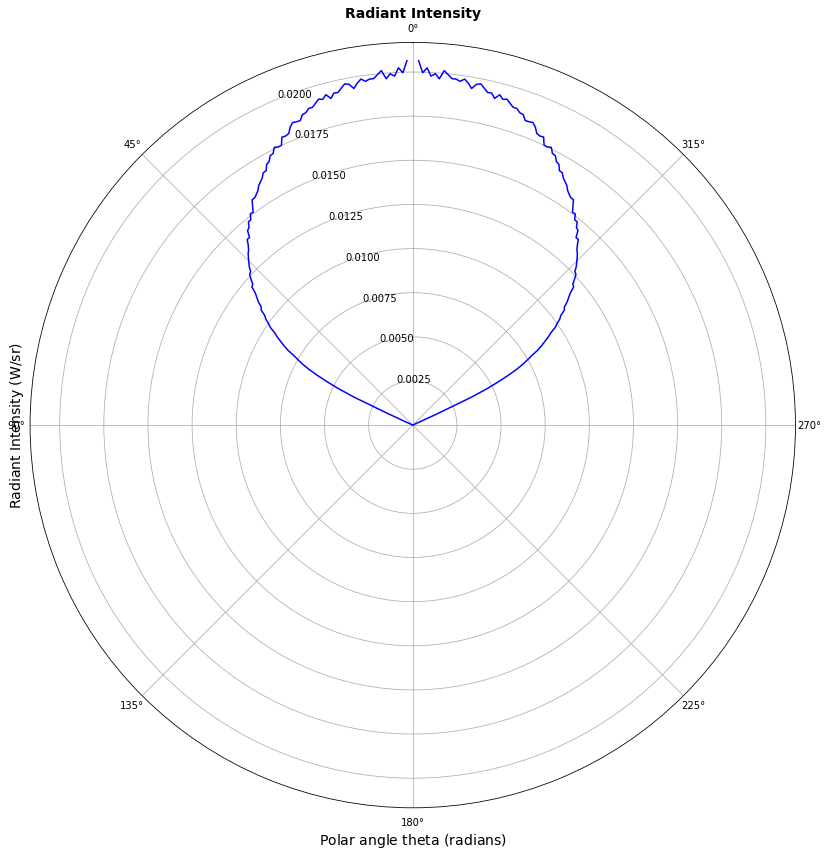

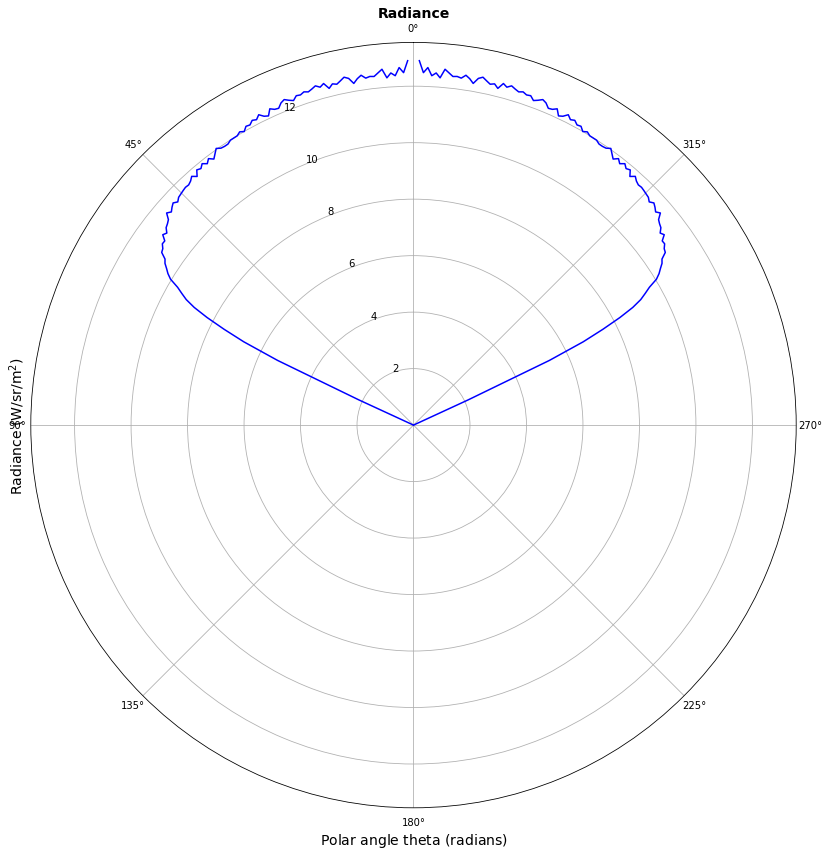

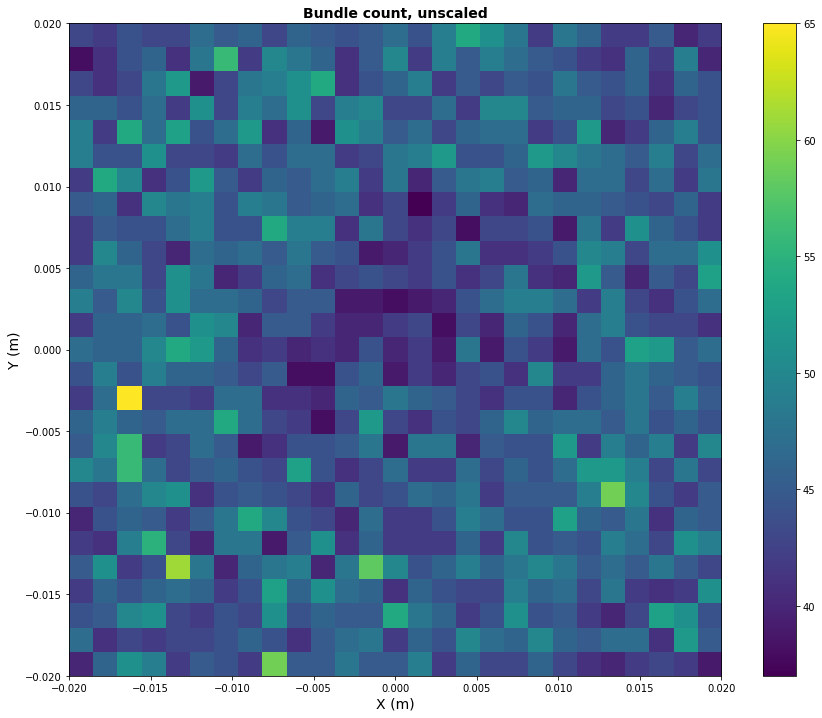

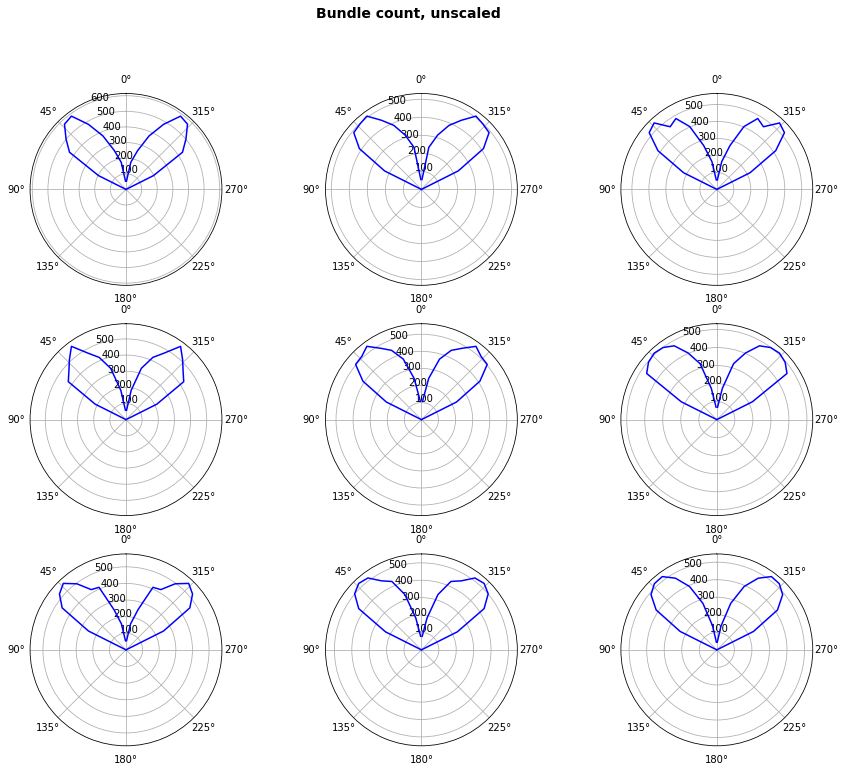

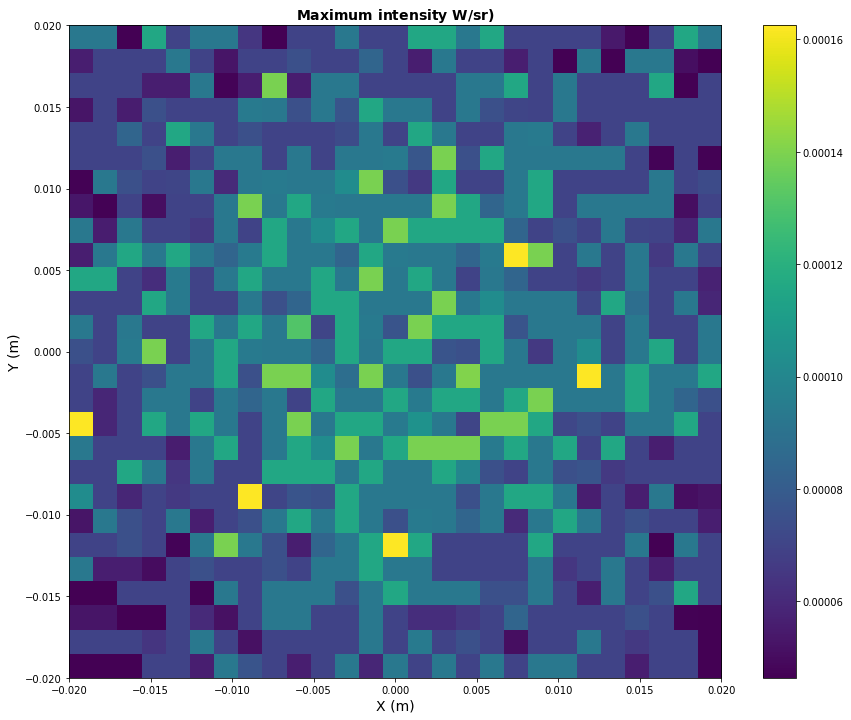

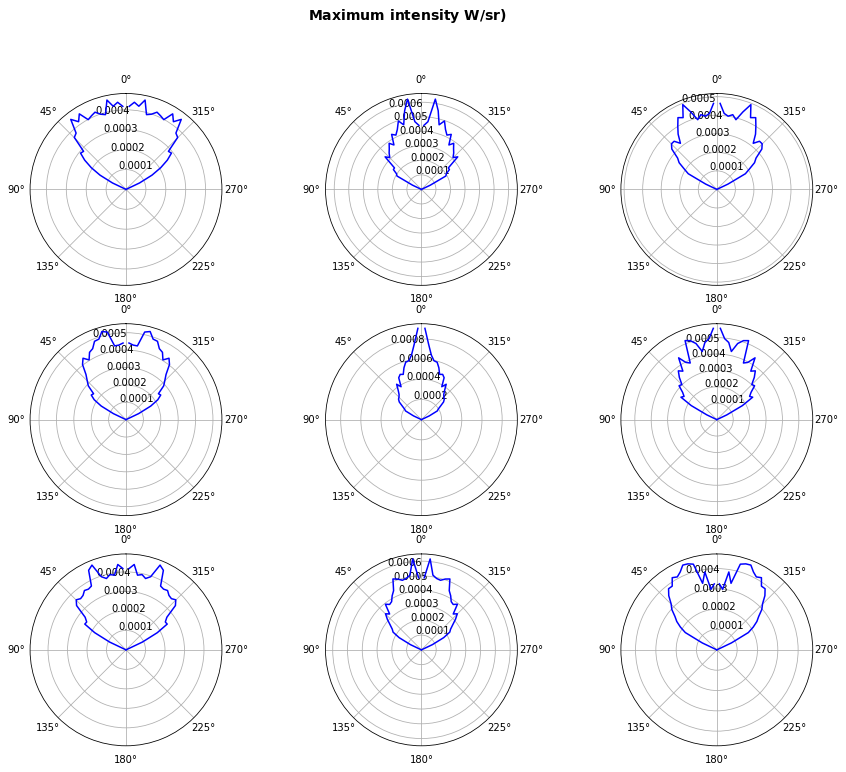

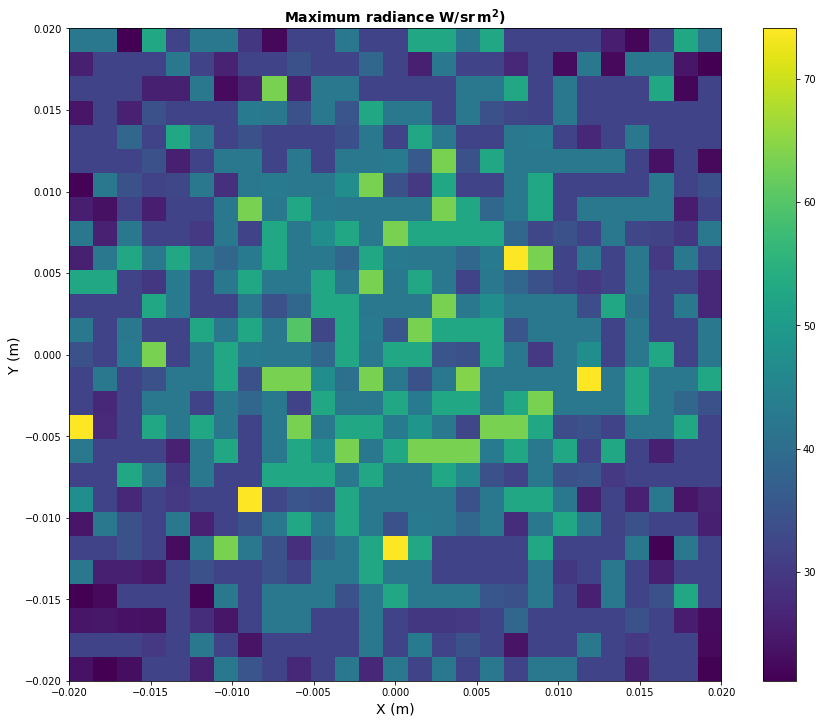

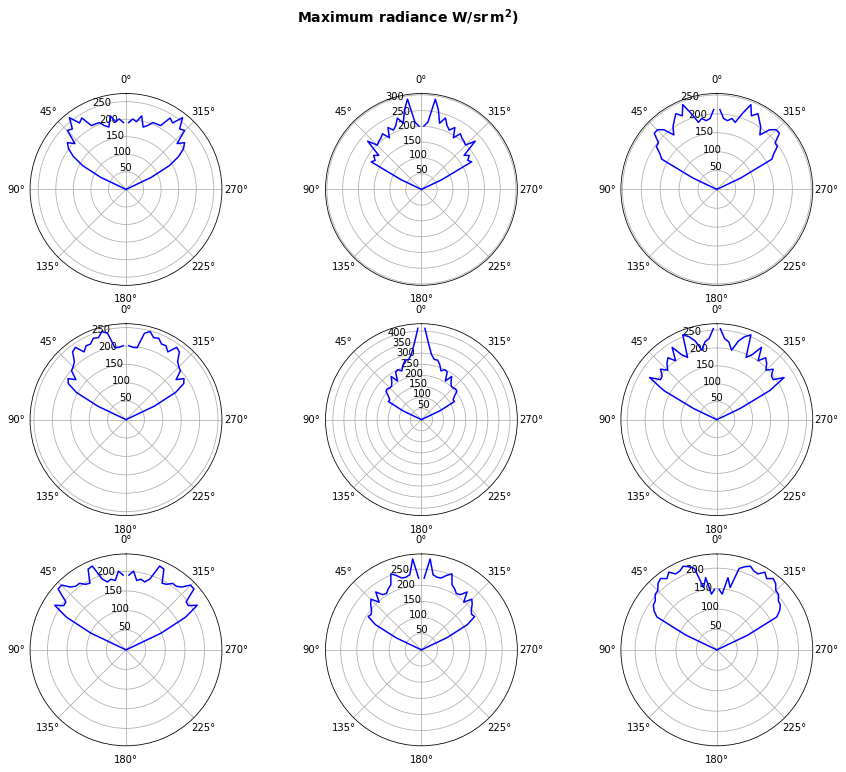

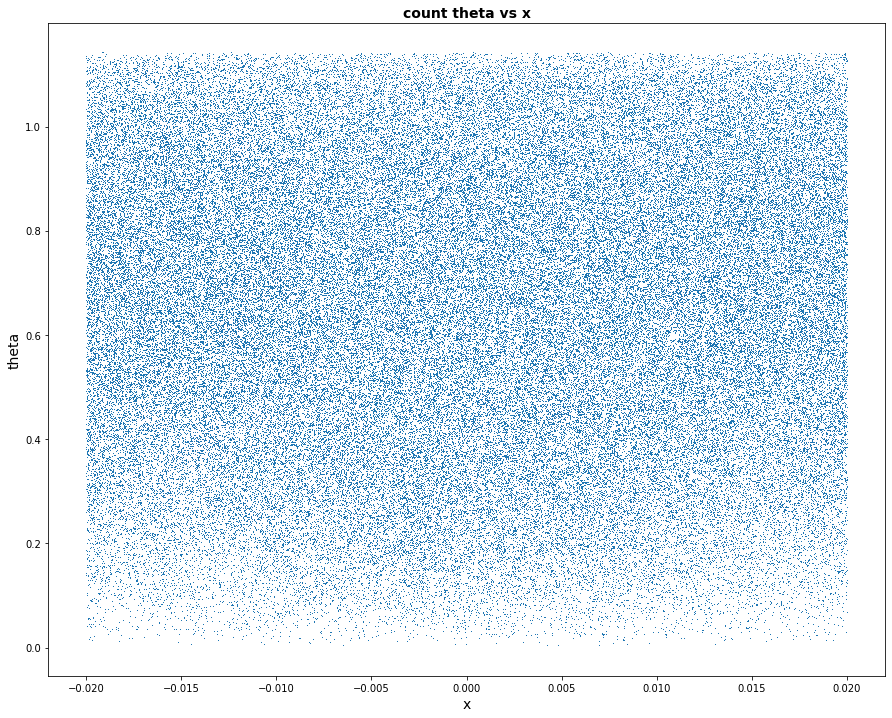

Output()

In [6]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

# <center> Outbound

photon bundle count: 119
photon total energy (J): 2.1296131261326355e-09


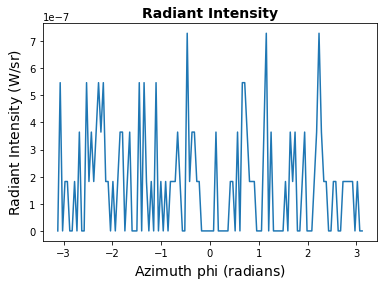

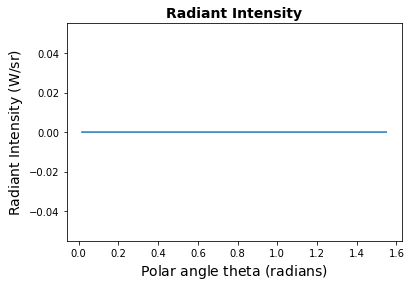

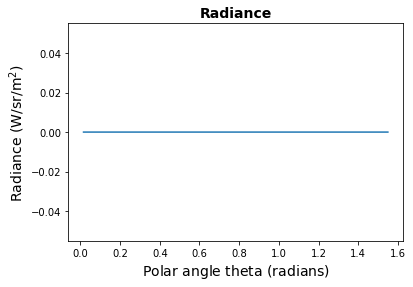

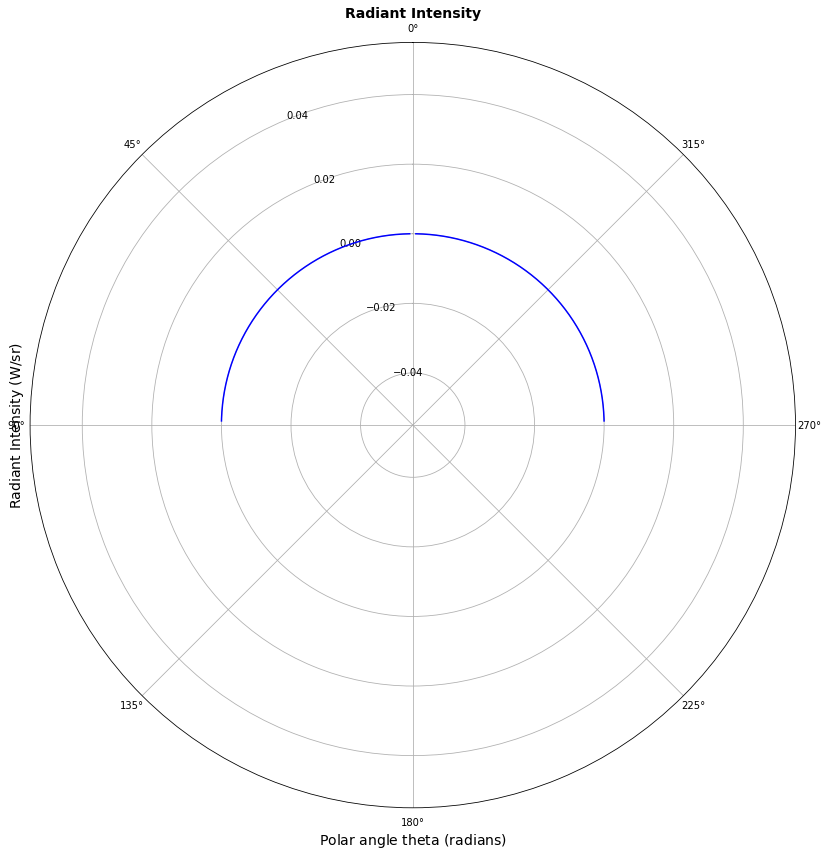

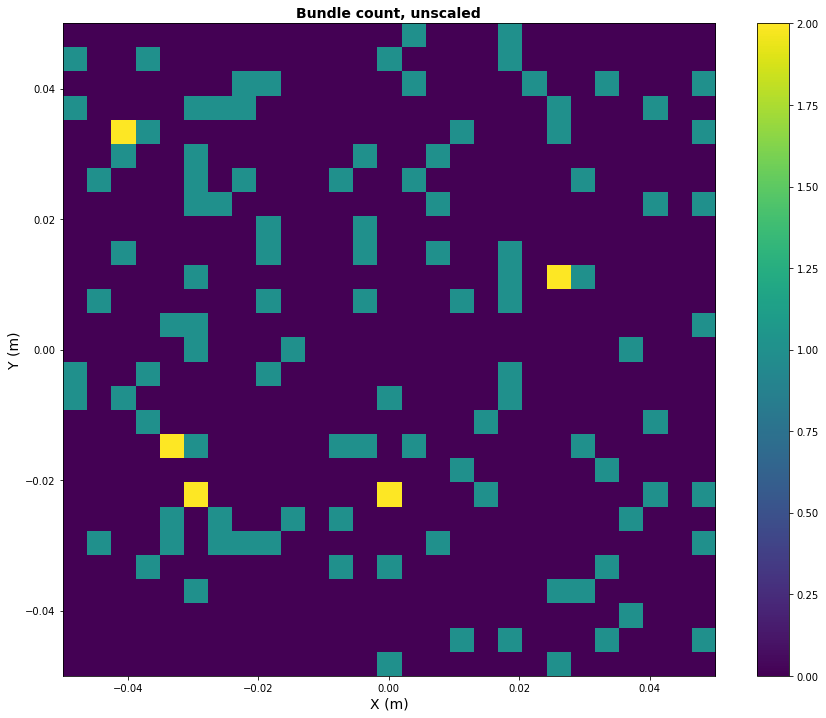

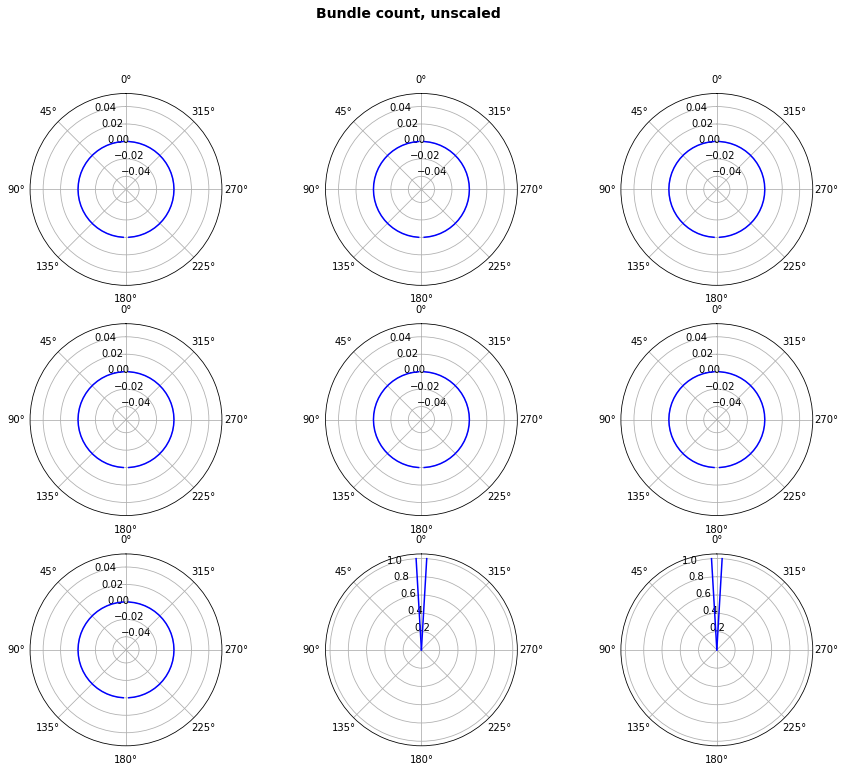

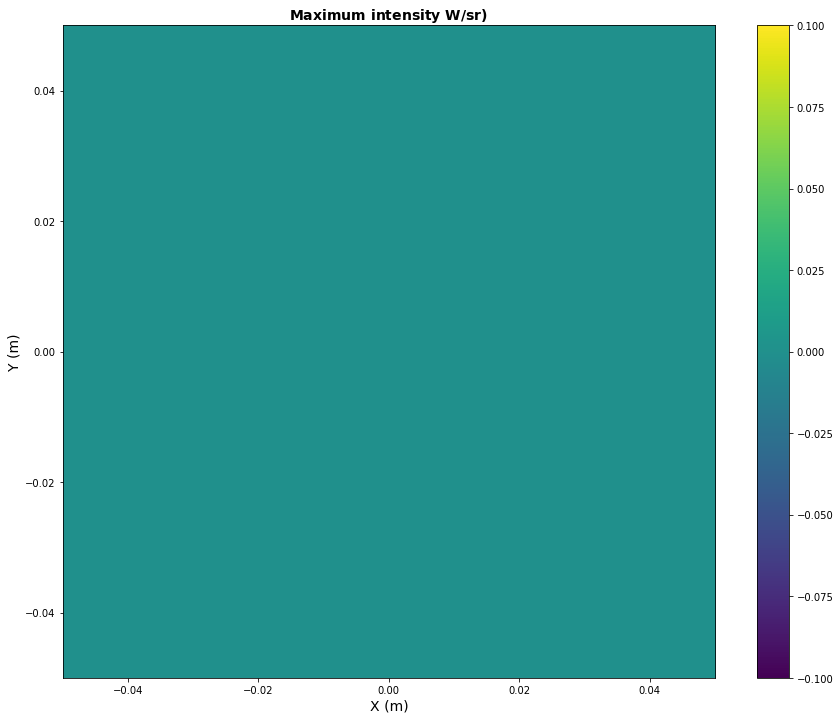

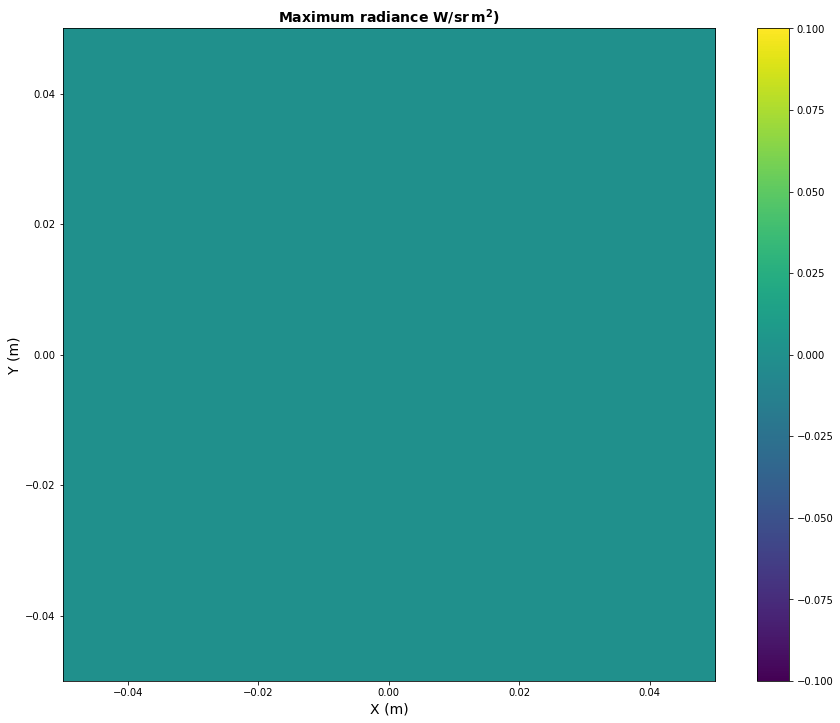

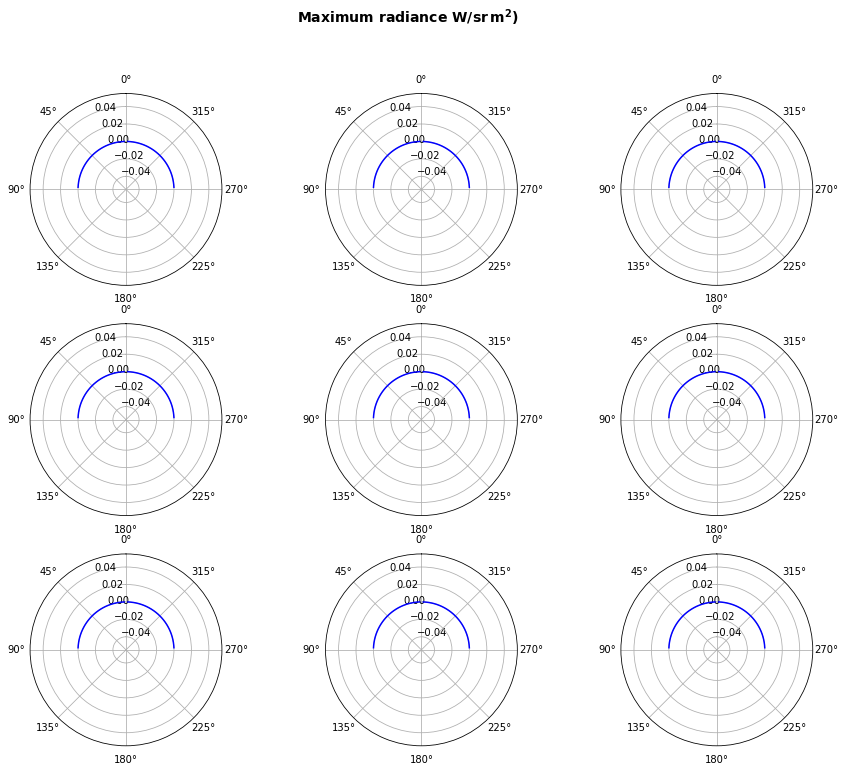

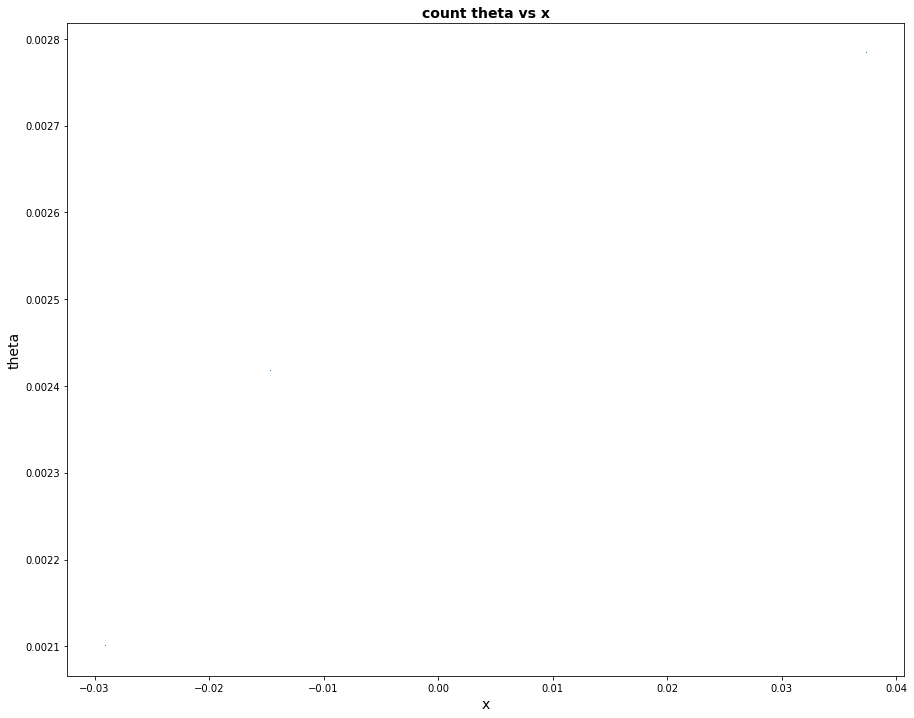

Output()

In [7]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

# <center> Inbound

photon bundle count: 119
photon total energy (J): 2.1296131261326355e-09


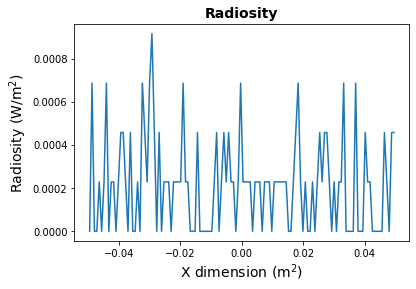

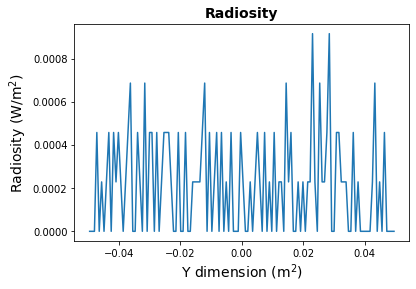

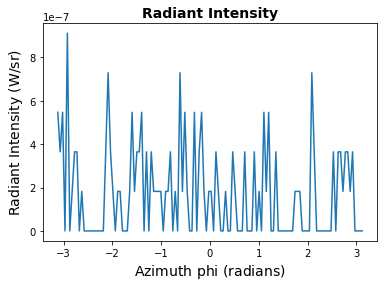

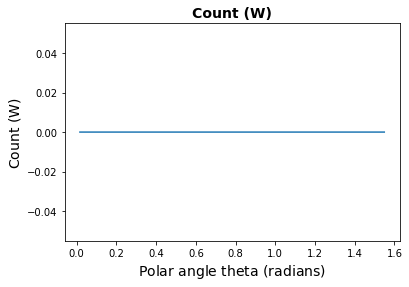

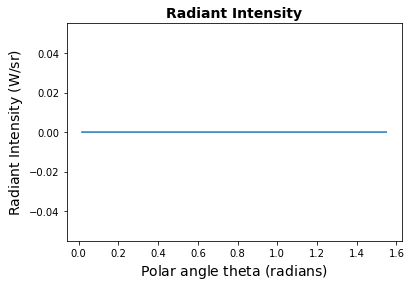

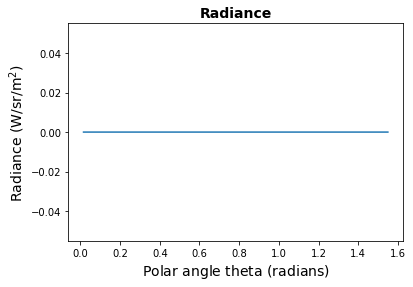

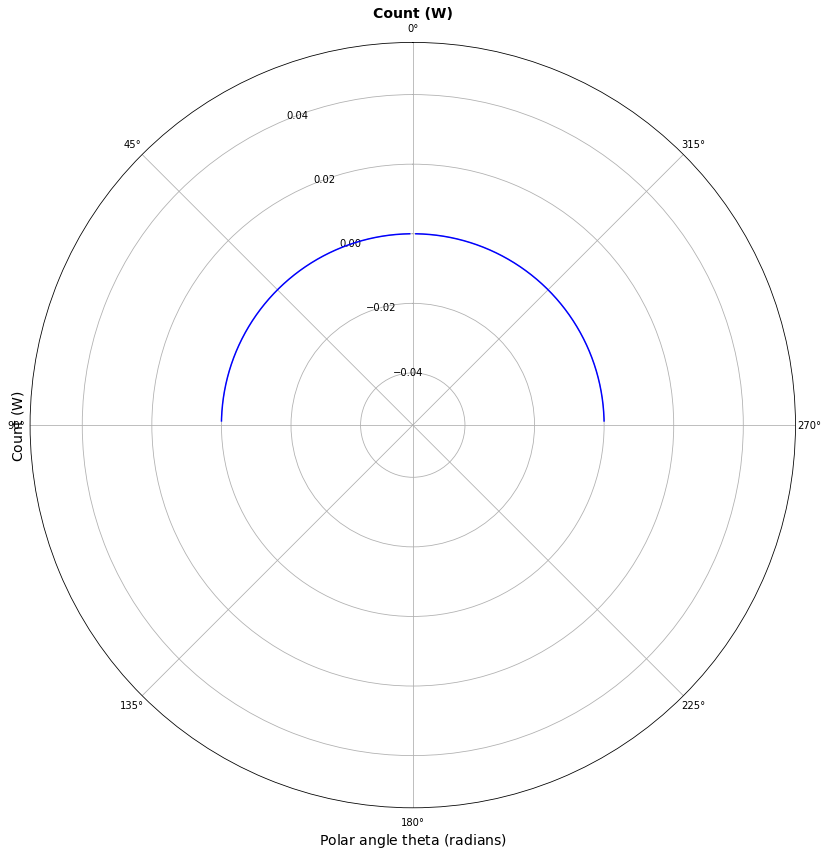

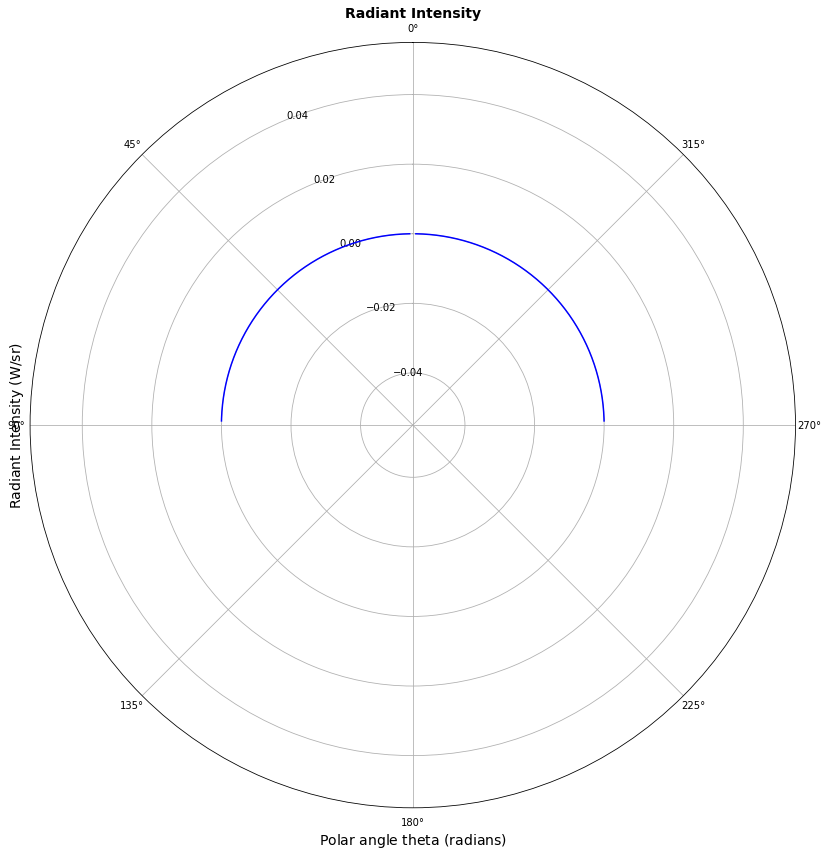

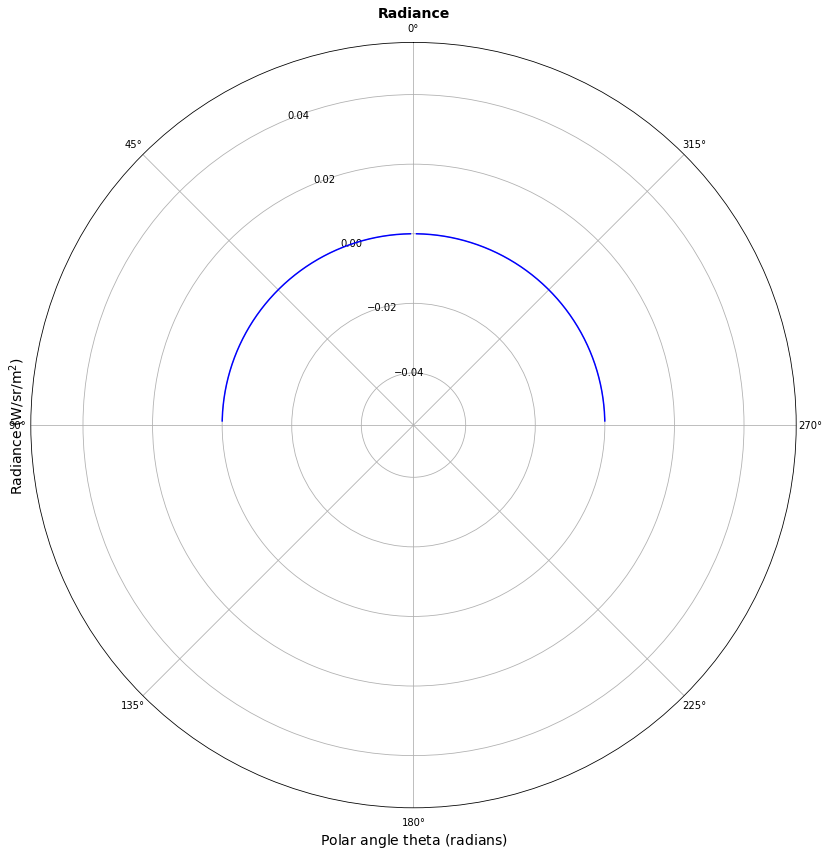

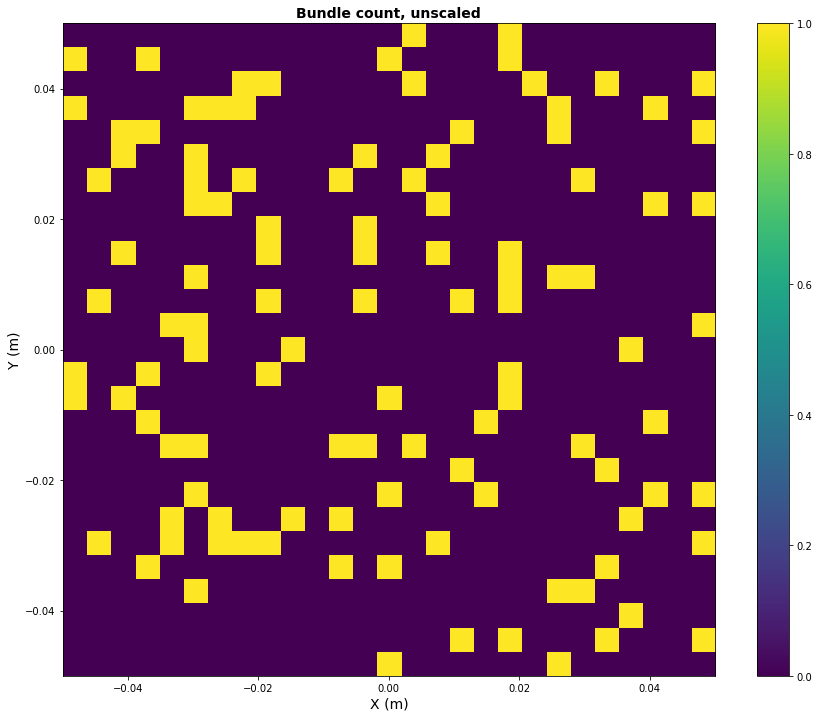

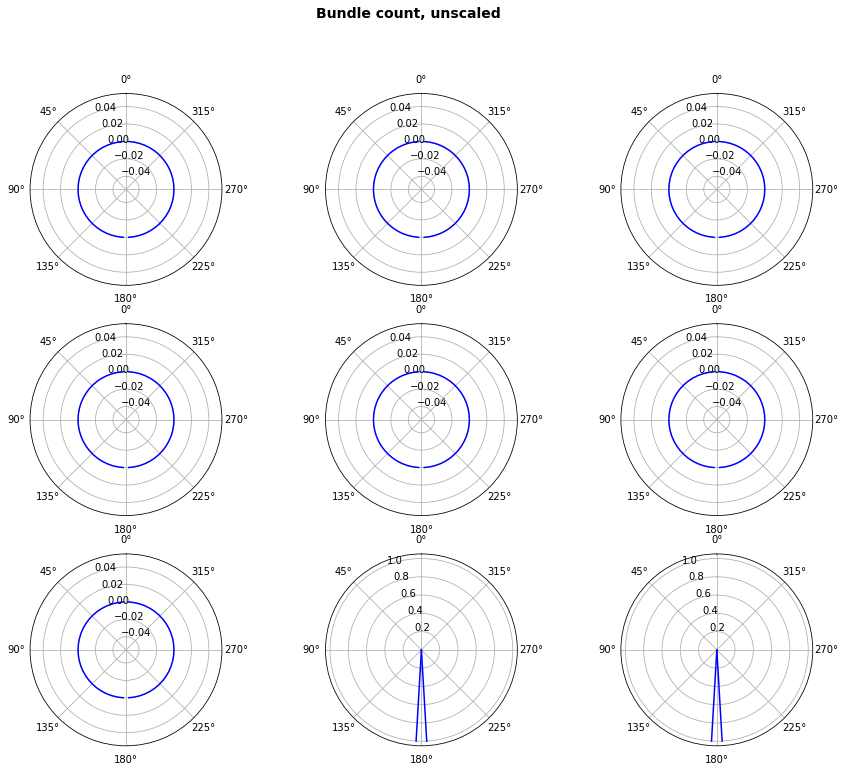

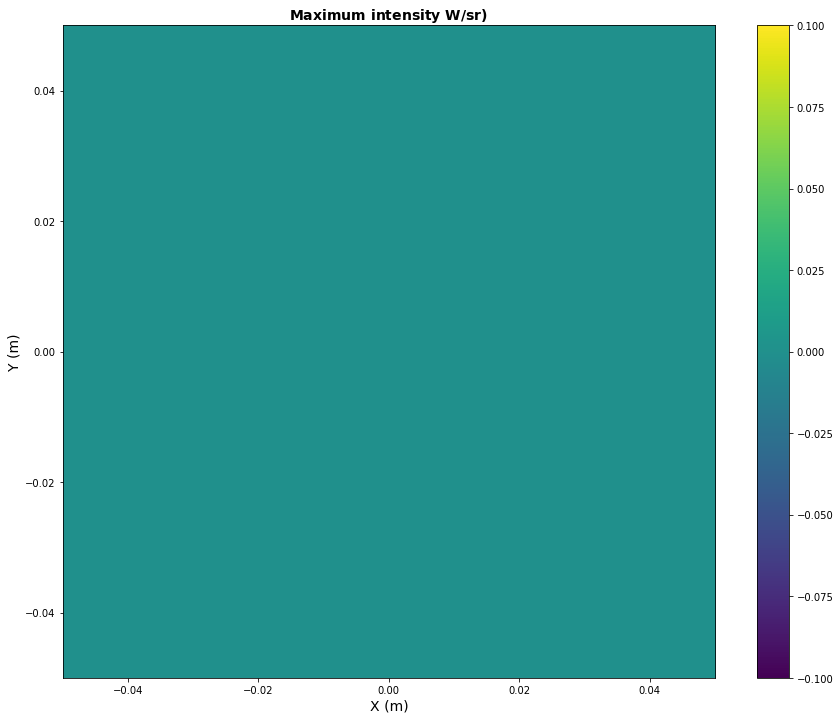

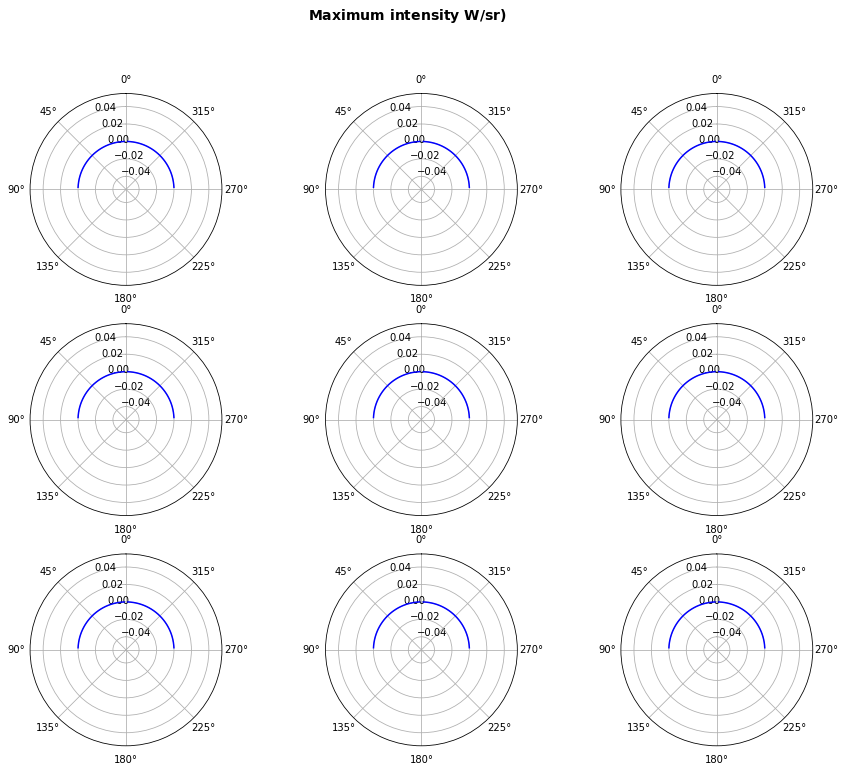

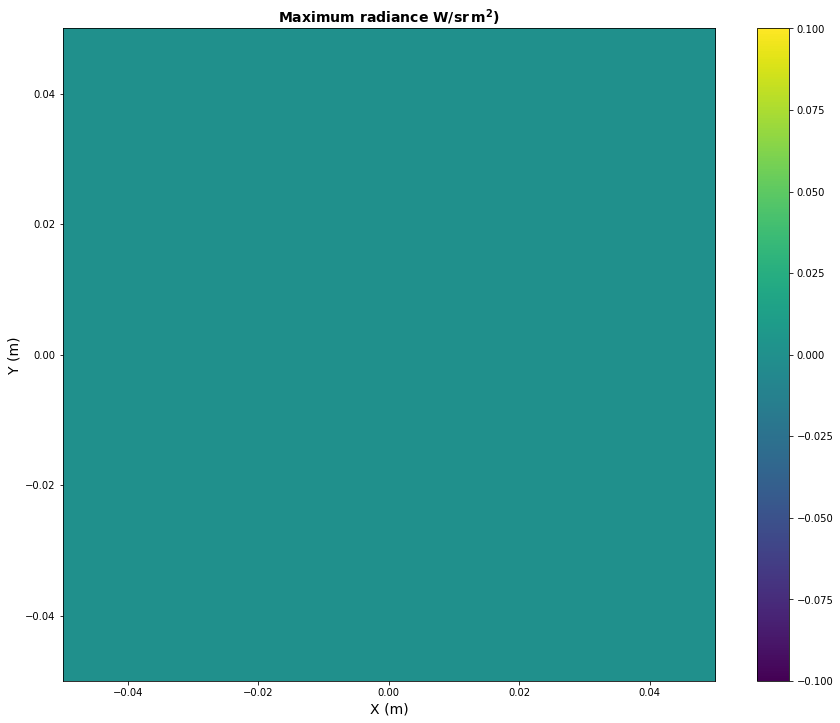

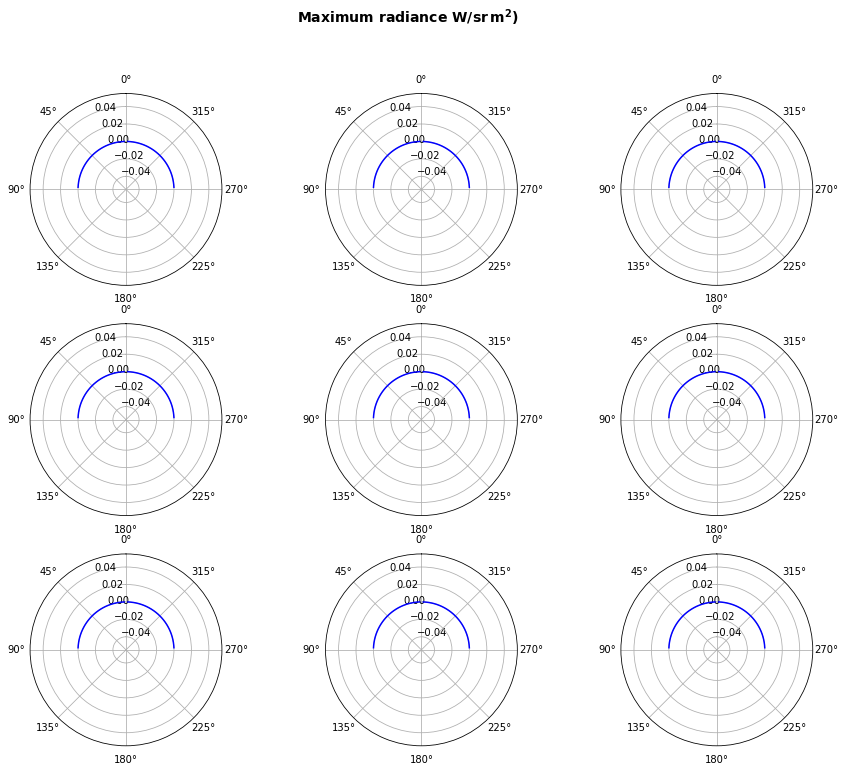

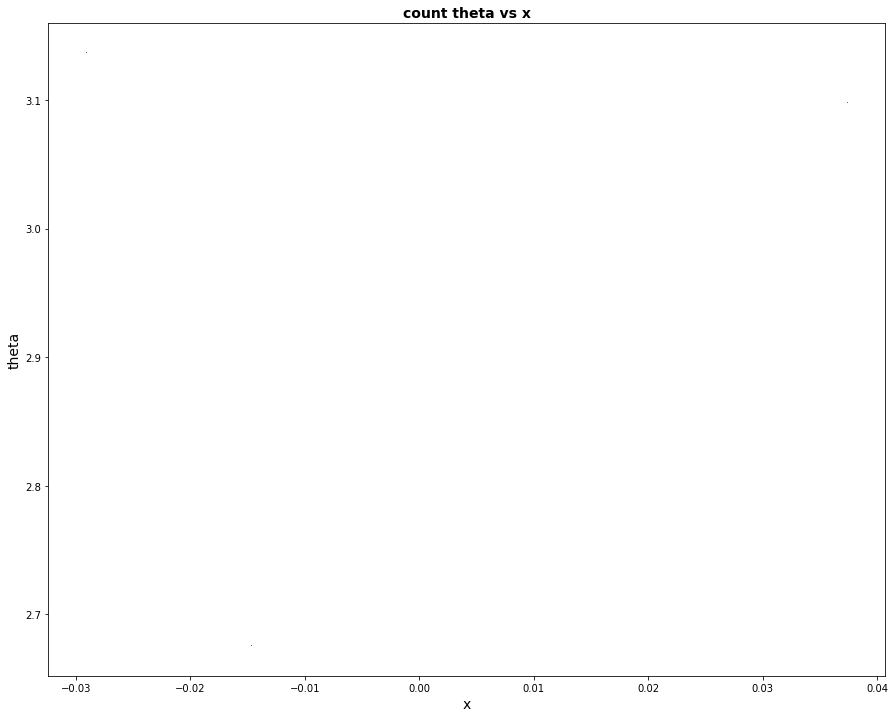

Output()

In [8]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

# <center> Camera Plane

photon bundle count: 52
photon total energy (J): 9.305872483940927e-10


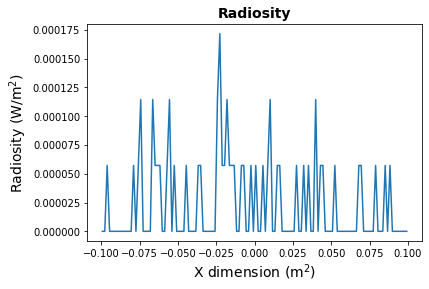

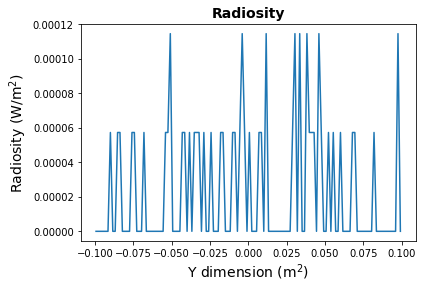

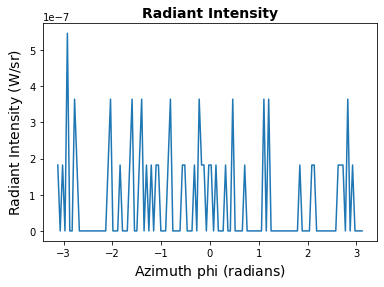

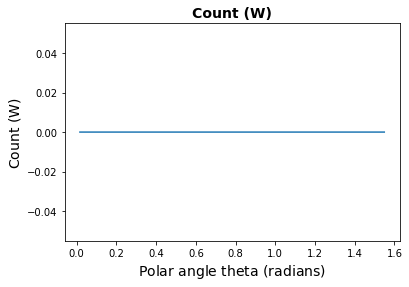

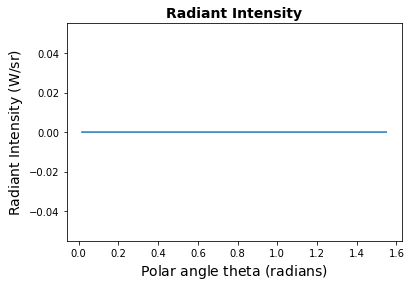

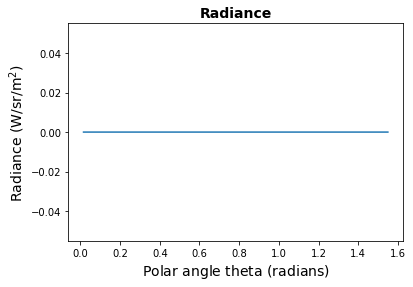

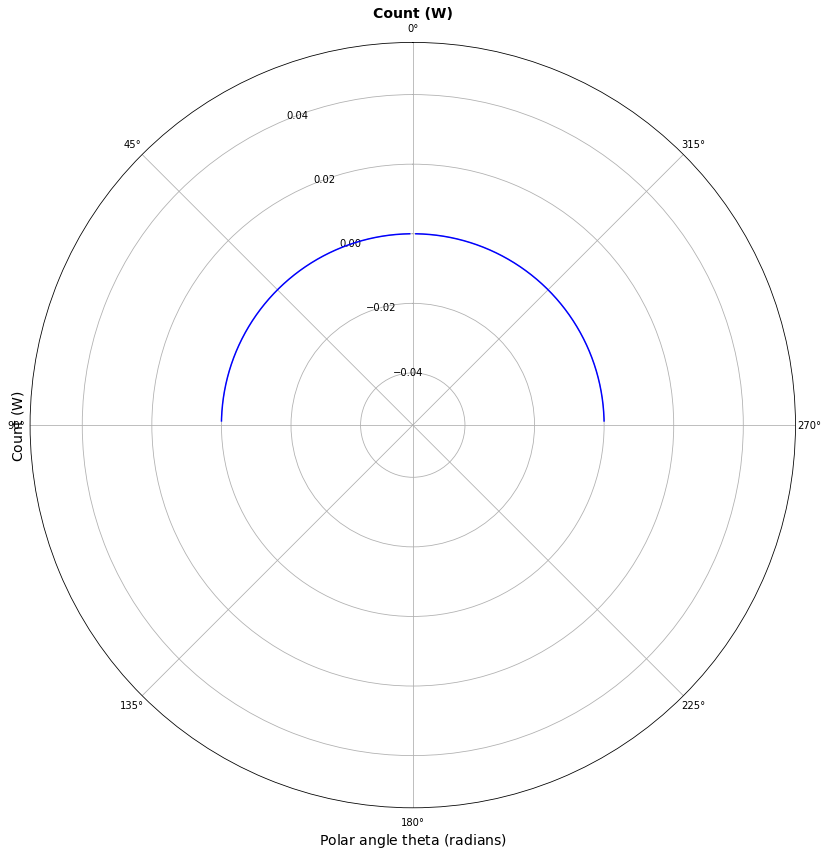

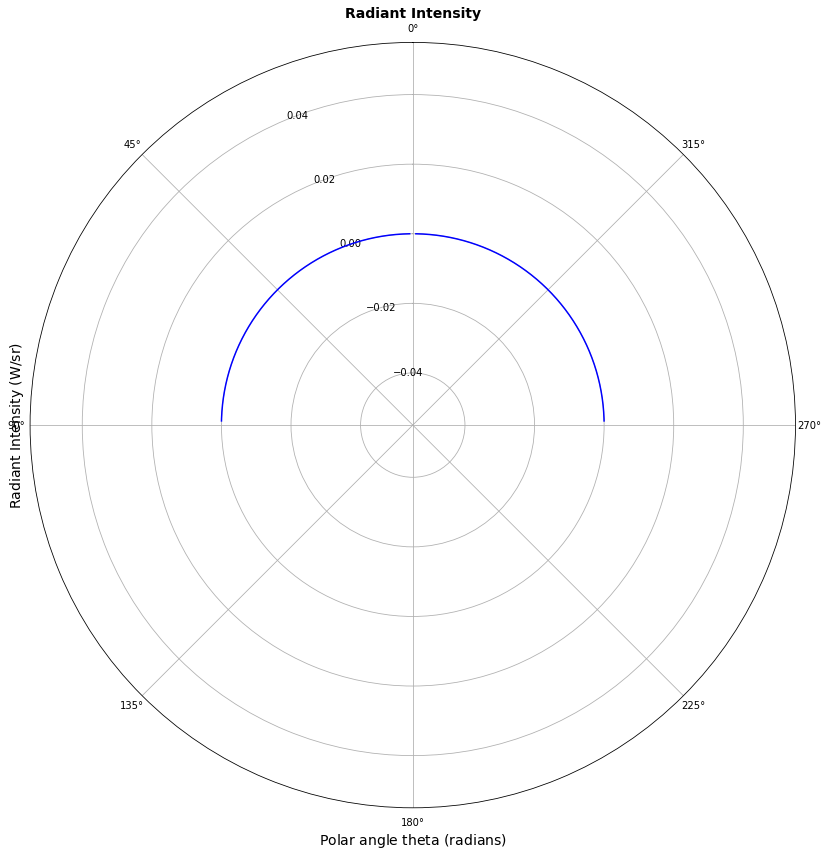

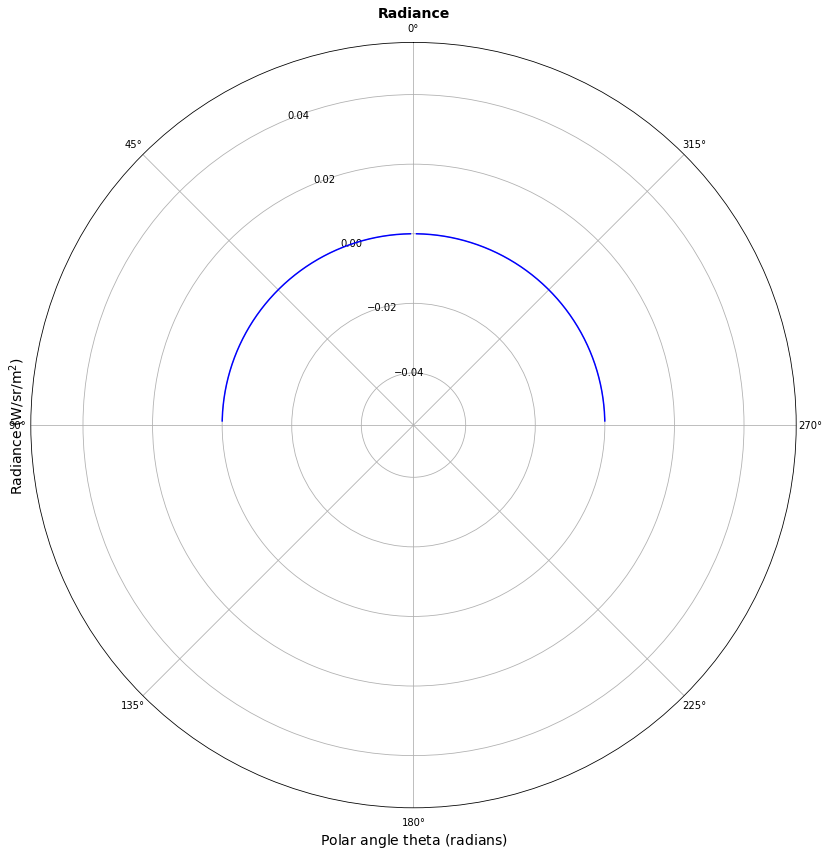

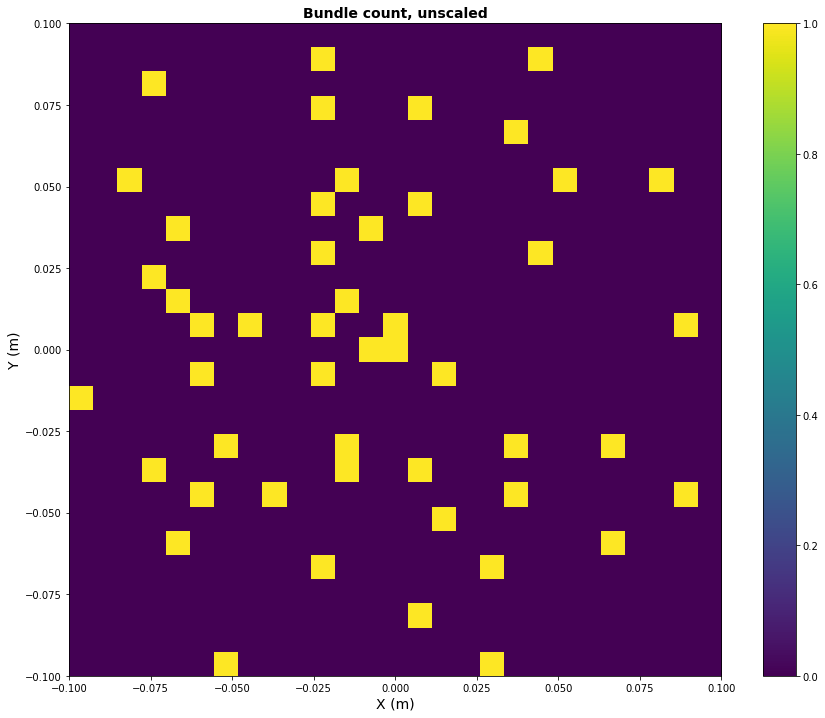

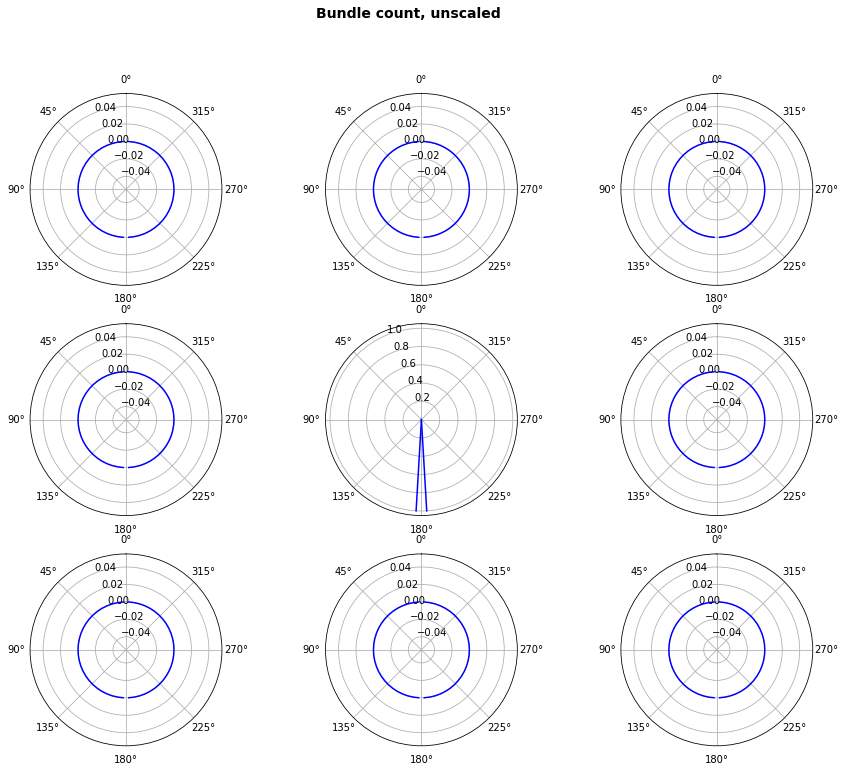

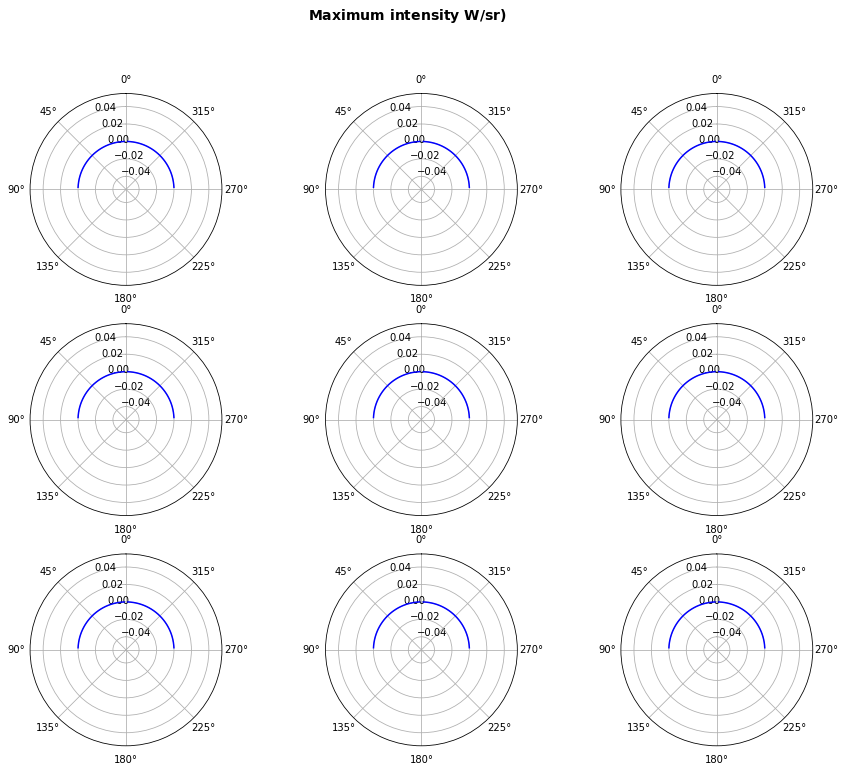

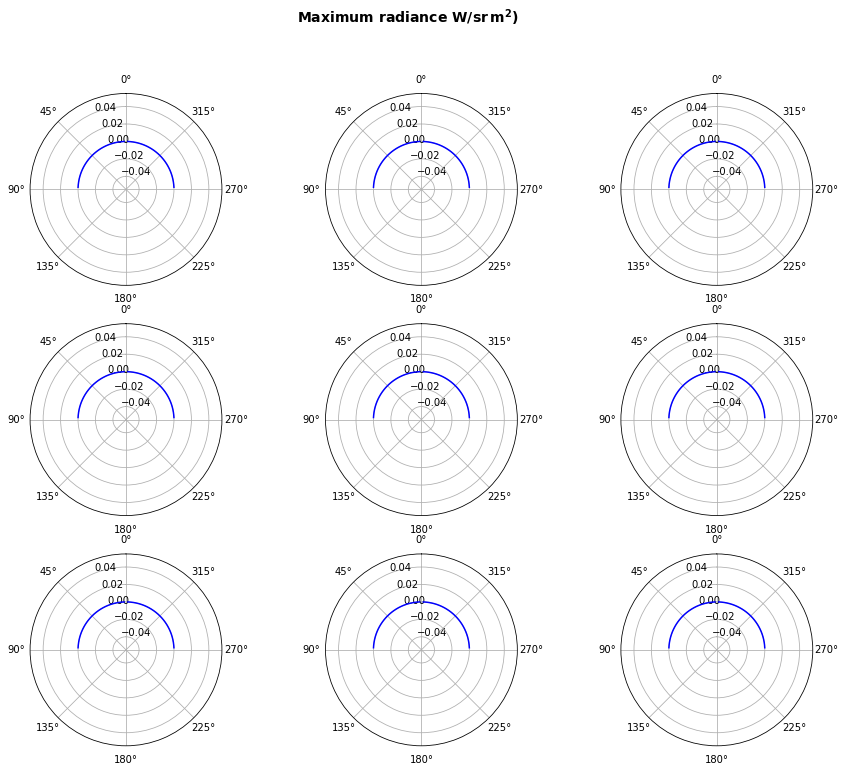

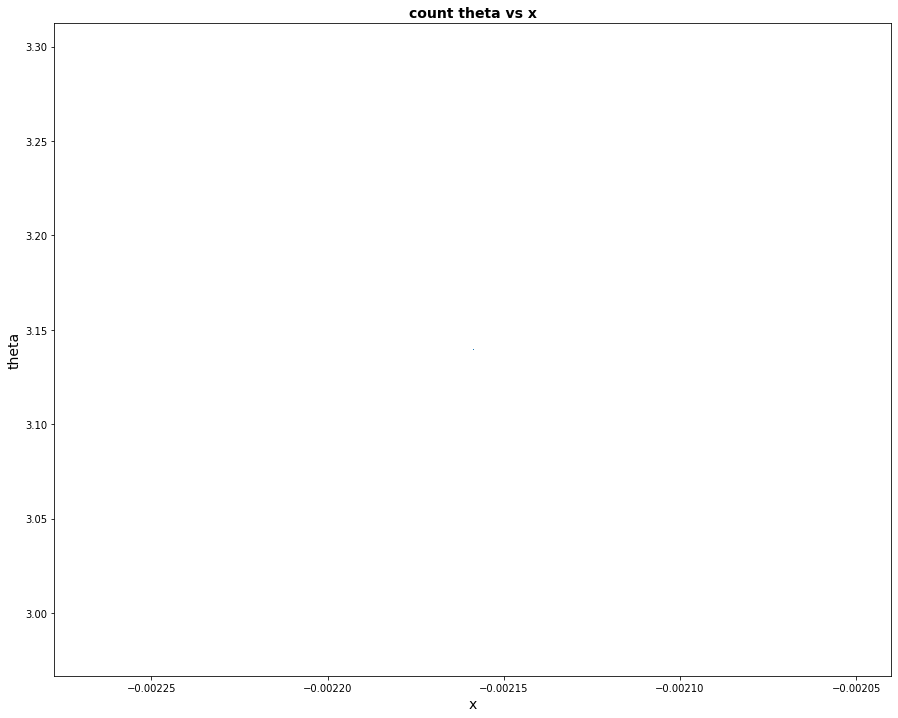

Output()

In [9]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

In [10]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])

Output()